In [2]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


# Load environment variables

In [3]:
load_dotenv()
user = os.environ['PG_USER']
password = os.environ['PG_PASSWORD']
host = os.environ['PG_HOST']
port = os.environ['PG_PORT']
database = 'postgres'

# Connect to Database

In [4]:
def connect():
    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(
              host=host,
              database=database,
              user=user,
              password=password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)   
        
    print("All good, Connection successful!")
    return conn

In [6]:
def list_tables(conn):
    cursor = conn.cursor()
    try:
        cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public' ORDER BY table_name")
        tables = cursor.fetchall()
        cursor.close()
        return tables
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return None



In [7]:
# Opening the connection
conn = connect()

# Check if the connection is established
if conn:
    print("Connection to PostgreSQL successful!")
    
    # Get a list of existing tables in the database
    tables = list_tables(conn)
    if tables:
        print("Existing tables in the 'public' schema:")
        for table in tables:
            print(table[0])
    else:
        print("Failed to retrieve table list.")
else:
    print("Failed to connect to PostgreSQL.")

# Closing the connection
if conn is not None:
    conn.close()
    print("Connection closed.")

Connecting..
All good, Connection successful!
Connection to PostgreSQL successful!
Existing tables in the 'public' schema:
banksaddata
googlestorereview
subscriberdata
Connection closed.


In [8]:
def sql_to_dataframe(conn, query):
    """Import data from a PostgreSQL database using a SELECT query"""
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:   
    tuples_list = cursor.fetchall()   
    
    # Now we need to transform the list into a pandas DataFrame:   
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [9]:
# Create query
query = """ SELECT * FROM public.banksaddata """

# Opening the connection
conn = connect()

# Loading our dataframe
tikvahBankData = sql_to_dataframe(conn, query)

# Closing the connection
conn.close()


Connecting..
All good, Connection successful!


In [10]:
tikvahBankData.sample(10)

,id,channel_username,message_id,message_link,views,message_content,date,image_html,banks,time
4,5,tikvahethiopia,81338,https://t.me/tikvahethiopia/81338,221056,#Bank_of_Abyssinia<br><br>ዕቁብ ልዩ የቁጠባ ሂሳብ!<br>...,"Sep 8, 2023 at 10:50","width: 800px; background-image: url(""https://c...",BOA,2023-08-09
5,6,tikvahethiopia,81252,https://t.me/tikvahethiopia/81252,257632,#Bank_of_Abyssinia<br><br>ለመጪዎቹ የአዲስ አመት፣ የመስቀ...,"Sep 5, 2023 at 13:19","width: 800px; background-image: url(""https://c...",BOA,2023-05-09
0,1,tikvahethiopia,87858,https://t.me/tikvahethiopia/87858,212588,#Abyssinia_Bank<br><br>ዕሴቶቻችሁንና የሸሪዓን መርሆች በማክ...,May 24 at 11:54,"width: 800px; background-image: url(""https://c...",BOA,2024-05-24
2,3,tikvahethiopia,81606,https://t.me/tikvahethiopia/81606,260029,#Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...,"Sep 19, 2023 at 18:53","width: 800px; background-image: url(""https://c...",BOA,2023-09-19
6,7,tikvahethiopia,81165,https://t.me/tikvahethiopia/81165,260547,#Bank_of_Abyssinia<br><br>አቢሲንያ ባንክ ለዕድሮች ባዘጋጀ...,"Sep 1, 2023 at 10:20","width: 800px; background-image: url(""https://c...",BOA,2023-01-09
1,2,tikvahethiopia,81734,https://t.me/tikvahethiopia/81734,241795,#Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...,"Sep 26, 2023 at 10:18","width: 800px; background-image: url(""https://c...",BOA,2023-09-26
3,4,tikvahethiopia,81502,https://t.me/tikvahethiopia/81502,271137,#Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...,"Sep 15, 2023 at 15:56","width: 800px; background-image: url(""https://c...",BOA,2023-09-15
7,8,tikvahethiopia,81123,https://t.me/tikvahethiopia/81123,233523,#Bank_of_Abyssinia<br><br>አቢሲንያ ባንክ ለዕድሮች ባዘጋጀ...,"Aug 29, 2023 at 21:02","width: 800px; background-image: url(""https://c...",BOA,2023-08-29
9,10,tikvahethiopia,76089,https://t.me/tikvahethiopia/76089,129550,አፖሎ የተሰኘው ልዩ የዲጂታል መተግበሪያ ለተጠቃሚ ዝግጁ መሆኑን ስንገልጽ...,"Jan 26, 2023 at 09:49","width: 800px; background-image: url(""https://c...",BOA,2023-01-26
8,9,tikvahethiopia,81123,https://t.me/tikvahethiopia/81123,233514,#Bank_of_Abyssinia<br><br>አቢሲንያ ባንክ ለዕድሮች ባዘጋጀ...,"Aug 29, 2023 at 21:02","width: 800px; background-image: url(""https://c...",BOA,2023-08-29


In [12]:
# Create query
query = """ SELECT * FROM public.googlestorereview """

# Opening the connection
conn = connect()

# Loading our dataframe
googleStoreReviewData = sql_to_dataframe(conn, query)

# Closing the connection
conn.close()


Connecting..
All good, Connection successful!


In [13]:
googleStoreReviewData.sample(10)

,reviewid,username,userimage,content,score,thumbsupcount,reviewcreatedversion,createdat,replycontent,repliedat,appversion,bank
1,58ccb5e9-0cf7-413c-8bb4-6515d4863bc1,Amenti Tesgera,https://play-lh.googleusercontent.com/a/ACg8oc...,🥰🥰🥰🥰🥰,5,0,24.05.07,2024-06-23 11:39:10,None,None,24.05.07,BOA
3,622762e8-14b9-42eb-b807-8960278d8b34,Hermon Z,https://play-lh.googleusercontent.com/a-/ALV-U...,What is that disable developer option I have n...,3,0,24.05.07,2024-06-22 07:03:55,None,None,24.05.07,BOA
6,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Very poor,1,0,24.05.07,2024-06-21 17:53:34,None,None,24.05.07,BOA
2,f77c9ee3-07b7-4203-9aaa-f019d35abaa6,Chernet Bekele,https://play-lh.googleusercontent.com/a/ACg8oc...,Cool,4,1,None,2024-06-22 14:02:36,None,None,None,BOA
5,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,All,5,0,24.05.07,2024-06-21 20:38:28,None,None,24.05.07,BOA
7,68fe0a10-cfc1-4bdd-b447-271fea684980,Adane Kelelew,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,5,0,None,2024-06-21 13:55:00,None,None,None,BOA
8,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,Playstore need to have some option to give 0 s...,1,20,24.05.07,2024-06-21 10:17:07,None,None,24.05.07,BOA
4,9756a397-2464-40d6-8eab-d269c119aa9e,Davinci Tube,https://play-lh.googleusercontent.com/a-/ALV-U...,Please fix the app i doesn't belongs to Abbssi...,1,0,24.05.07,2024-06-22 02:01:58,None,None,24.05.07,BOA
0,1c7fe538-d19f-40ac-9b8b-3e3458f8a26e,Ibsaa Carcar,https://play-lh.googleusercontent.com/a-/ALV-U...,Very Very nice 👌 👍,5,0,None,2024-06-23 20:37:43,None,None,None,BOA
9,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,It's good when i've downloaded at first. But n...,2,0,24.05.07,2024-06-20 20:29:06,None,None,24.05.07,BOA


In [14]:
# Create query
query = """ SELECT * FROM public.subscriberdata """

# Opening the connection
conn = connect()

# Loading our dataframe
subscriberData = sql_to_dataframe(conn, query)

# Closing the connection
conn.close()


Connecting..
All good, Connection successful!


In [15]:
subscriberData.sample(10)

,time,subscriber_count,date
14,04:00,3,2024-05-25
23,18:00,49,2024-05-24
105,05:00,27,2024-05-21
239,14:00,44,2024-05-15
248,05:00,21,2024-05-15
6,12:00,30,2024-05-25
242,11:00,71,2024-05-15
80,07:00,18,2024-05-22
209,20:00,2,2024-05-16
79,08:00,20,2024-05-22


# Raw Layer

# EDA

# Data Summerization

In [17]:
def summarize_data(df):
    # Basic Information
    def basic_info(df):
        print(df.info())
        print(df.describe(include='all'))
        print(df.isnull().sum())

    # Specific Summarizations
    def specific_summarizations(df):
        num_records = df.shape[0]
        num_unique_values = df.nunique()
        
        print(f'Number of records: {num_records}')
        print('Number of unique values per column:')
        print(num_unique_values)
        
        for column in df.columns:
            if df[column].dtype == 'object':
                print(f'\nTop 5 most frequent values in column "{column}":')
                print(df[column].value_counts().head())
            elif df[column].dtype in ['int64', 'float64']:
                total = df[column].sum()
                mean = df[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')
                
                if pd.to_datetime(df[column], errors='coerce').notnull().all():
                    df[column] = pd.to_datetime(df[column])
                    messages_per_period = df[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period)
        
        numeric_columns = df.select_dtypes(include=['number']).columns
        if not numeric_columns.empty:
            top_messages = df.nlargest(5, numeric_columns[0])
            print('\nTop 5 records by the first numerical column:')
            print(top_messages)
        else:
            print('\nNo numerical columns to display top records.')

    # Data Visualization
    def visualize_data(df):
        for column in df.columns:
            if pd.api.types.is_datetime64_any_dtype(df[column]):
                messages_per_month = df[column].dt.to_period('M').value_counts().sort_index()
                
                plt.figure(figsize=(10, 6))
                messages_per_month.plot(kind='bar')
                plt.title(f'Number of Records per Month for "{column}"')
                plt.xlabel('Month')
                plt.ylabel('Number of Records')
                plt.show()
                
            elif df[column].dtype in ['int64', 'float64']:
                plt.figure(figsize=(10, 6))
                sns.histplot(df[column], bins=20, kde=True)
                plt.title(f'Distribution of "{column}"')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

    # Calling functions
    print("Basic Information:")
    basic_info(df)
    print("\nSpecific Summarizations:")
    specific_summarizations(df)
    print("\nVisualizations:")
    visualize_data(df)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10 non-null     int64         
 1   channel_username  10 non-null     object        
 2   message_id        10 non-null     object        
 3   message_link      10 non-null     object        
 4   views             10 non-null     object        
 5   message_content   10 non-null     object        
 6   date              10 non-null     object        
 7   image_html        10 non-null     object        
 8   banks             10 non-null     object        
 9   time              10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 928.0+ bytes
None
              id channel_username message_id  \
count   10.00000               10         10   
unique       NaN                1          9   
top     

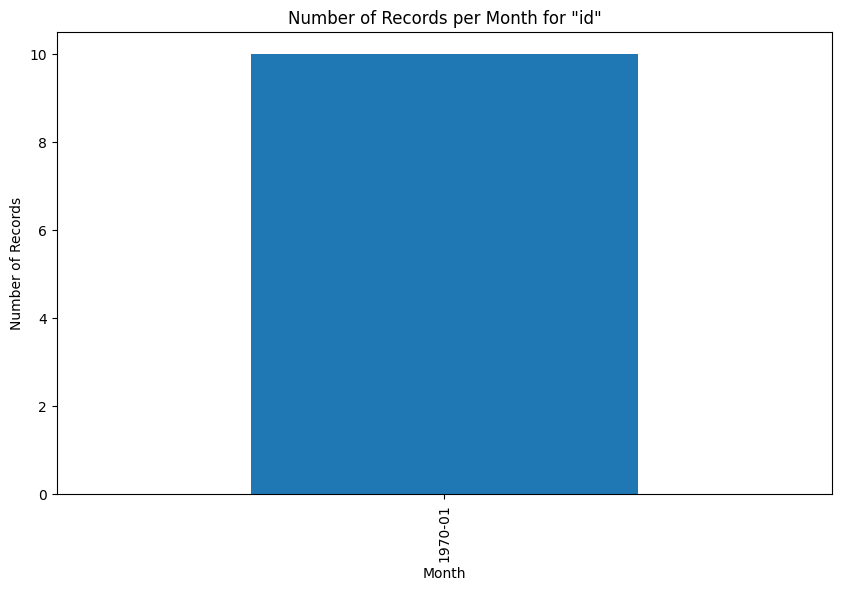

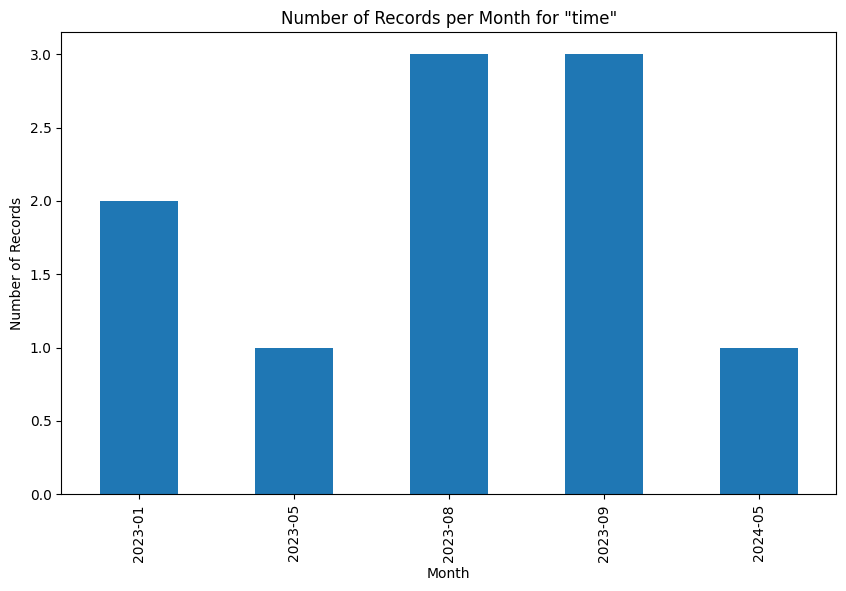

In [18]:
summarize_data(tikvahBankData)

- The months September and August 2023 had the highest records of advertisements
- The months May of 2023 and May of 2024 had the lowest records of advertisements

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewid              10 non-null     object        
 1   username              10 non-null     object        
 2   userimage             10 non-null     object        
 3   content               10 non-null     object        
 4   score                 10 non-null     int64         
 5   thumbsupcount         10 non-null     int64         
 6   reviewcreatedversion  7 non-null      object        
 7   createdat             10 non-null     datetime64[ns]
 8   replycontent          0 non-null      object        
 9   repliedat             0 non-null      object        
 10  appversion            7 non-null      object        
 11  bank                  10 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.1+ K

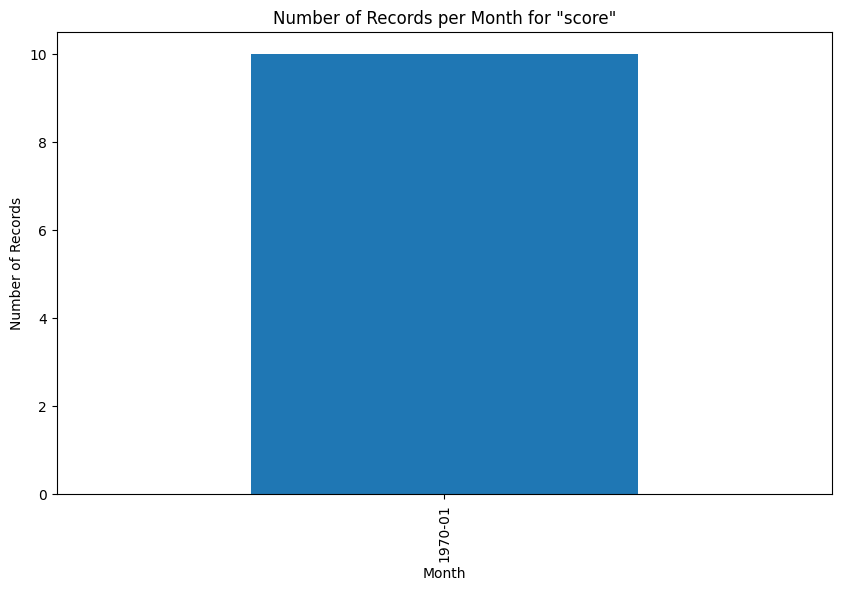

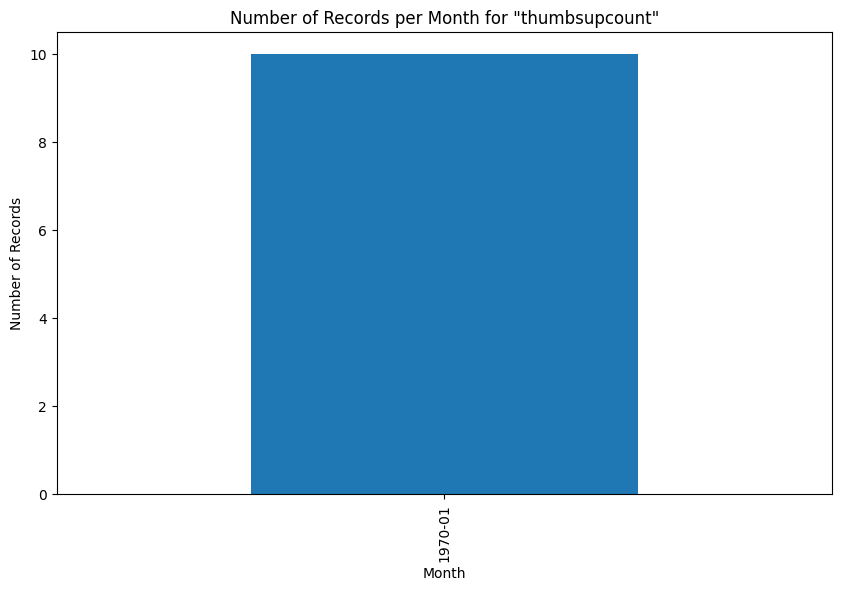

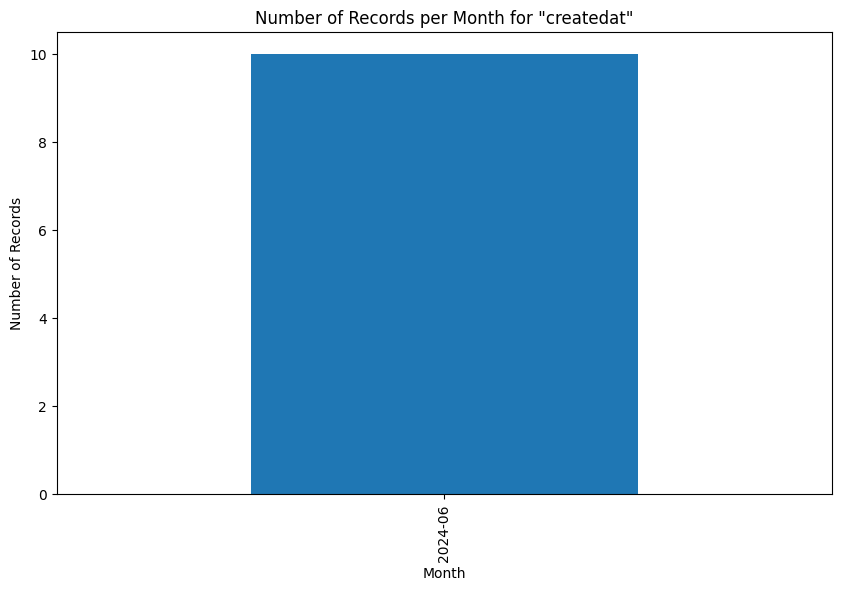

In [19]:
summarize_data(googleStoreReviewData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time              254 non-null    object
 1   subscriber_count  254 non-null    int64 
 2   date              254 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.1+ KB
None
         time  subscriber_count        date
count     254        254.000000         254
unique     24               NaN          11
top     18:00               NaN  2024-05-20
freq       11               NaN          24
mean      NaN         41.633858         NaN
std       NaN        105.444681         NaN
min       NaN        -18.000000         NaN
25%       NaN          4.000000         NaN
50%       NaN         20.000000         NaN
75%       NaN         42.000000         NaN
max       NaN        848.000000         NaN
time                0
subscriber_count    0
date                

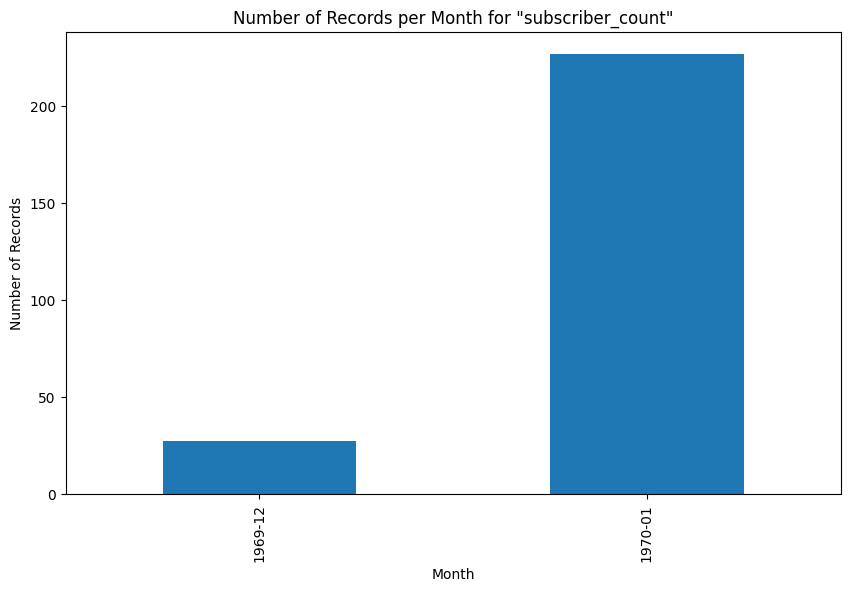

In [20]:
summarize_data(subscriberData)

# Data Quality Assesment

In [21]:
def data_quality_assessment(df):
    def check_missing_values(df):
        missing_values = df.isnull().sum()
        missing_values_percent = (missing_values / len(df)) * 100
        missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percent})
        return missing_df

    def check_duplicates(df):
        duplicates = df.duplicated().sum()
        return duplicates

    def check_data_types(df):
        data_types = df.dtypes
        return data_types

    def basic_statistics(df):
        stats = df.describe(include='all').transpose()
        return stats

    # Call the individual checks
    print("Checking for Missing Values:")
    missing_df = check_missing_values(df)
    print(missing_df)

    print("\nChecking for Duplicates:")
    duplicates = check_duplicates(df)
    print(f'Total Duplicates: {duplicates}')

    print("\nChecking Data Types:")
    data_types = check_data_types(df)
    print(data_types)

    print("\nBasic Statistics for Each Column:")
    stats = basic_statistics(df)
    print(stats)



In [22]:
data_quality_assessment(tikvahBankData)

Checking for Missing Values:
                  Missing Values  Percentage
id                             0         0.0
channel_username               0         0.0
message_id                     0         0.0
message_link                   0         0.0
views                          0         0.0
message_content                0         0.0
date                           0         0.0
image_html                     0         0.0
banks                          0         0.0
time                           0         0.0

Checking for Duplicates:
Total Duplicates: 0

Checking Data Types:
id                  datetime64[ns]
channel_username            object
message_id                  object
message_link                object
views                       object
message_content             object
date                        object
image_html                  object
banks                       object
time                datetime64[ns]
dtype: object

Basic Statistics for Each Column:
         

In [23]:
data_quality_assessment(googleStoreReviewData)

Checking for Missing Values:
                      Missing Values  Percentage
reviewid                           0         0.0
username                           0         0.0
userimage                          0         0.0
content                            0         0.0
score                              0         0.0
thumbsupcount                      0         0.0
reviewcreatedversion               3        30.0
createdat                          0         0.0
replycontent                      10       100.0
repliedat                         10       100.0
appversion                         3        30.0
bank                               0         0.0

Checking for Duplicates:
Total Duplicates: 0

Checking Data Types:
reviewid                        object
username                        object
userimage                       object
content                         object
score                   datetime64[ns]
thumbsupcount           datetime64[ns]
reviewcreatedversion            

In [24]:
googleStoreReviewData.drop(columns=['replycontent', 'repliedat'], inplace=True)

In [25]:
googleStoreReviewData['reviewcreatedversion'].unique()
googleStoreReviewData['appversion'].unique()

array([None, '24.05.07'], dtype=object)

In [26]:
mode_val = googleStoreReviewData['reviewcreatedversion'].mode()[0]
googleStoreReviewData['reviewcreatedversion'].fillna(mode_val, inplace=True)
print(mode_val)
mode_val = googleStoreReviewData['appversion'].mode()[0]
print(mode_val)
googleStoreReviewData['appversion'].fillna(mode_val, inplace=True)


24.05.07
24.05.07


C:\Users\bageg\AppData\Local\Temp\ipykernel_10444\3300536162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  googleStoreReviewData['reviewcreatedversion'].fillna(mode_val, inplace=True)
C:\Users\bageg\AppData\Local\Temp\ipykernel_10444\3300536162.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [27]:
googleStoreReviewData['reviewcreatedversion'].unique()
googleStoreReviewData['appversion'].unique()

array(['24.05.07'], dtype=object)

In [28]:
data_quality_assessment(googleStoreReviewData)

Checking for Missing Values:
                      Missing Values  Percentage
reviewid                           0         0.0
username                           0         0.0
userimage                          0         0.0
content                            0         0.0
score                              0         0.0
thumbsupcount                      0         0.0
reviewcreatedversion               0         0.0
createdat                          0         0.0
appversion                         0         0.0
bank                               0         0.0

Checking for Duplicates:
Total Duplicates: 0

Checking Data Types:
reviewid                        object
username                        object
userimage                       object
content                         object
score                   datetime64[ns]
thumbsupcount           datetime64[ns]
reviewcreatedversion            object
createdat               datetime64[ns]
appversion                      object
bank         

In [29]:
data_quality_assessment(subscriberData)

Checking for Missing Values:
                  Missing Values  Percentage
time                           0         0.0
subscriber_count               0         0.0
date                           0         0.0

Checking for Duplicates:
Total Duplicates: 0

Checking Data Types:
time                        object
subscriber_count    datetime64[ns]
date                        object
dtype: object

Basic Statistics for Each Column:
                 count unique         top freq                           mean  \
time               254     24       18:00   11                            NaN   
subscriber_count   254    NaN         NaN  NaN  1970-01-01 00:00:00.000000041   
date               254     11  2024-05-20   24                            NaN   

                                            min  \
time                                        NaN   
subscriber_count  1969-12-31 23:59:59.999999982   
date                                        NaN   

                                       

# Univariant analysis

In [30]:
def univariate_analysis(df):
    def analyze_column(column):
        print(f"Analysis for column: {column.name}")

        # Descriptive statistics
        print(column.describe(include='all'))
        print("\n")

        # Visualization
        plt.figure(figsize=(10, 6))
        
        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30)
            plt.title(f'Histogram of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line')
            plt.title(f'Time Series of {column.name}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')
        else:
            column.value_counts().plot(kind='bar')
            plt.title(f'Bar Plot of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')

        plt.show()
        print("\n\n")

    for column in df.columns:
        analyze_column(df[column])



Analysis for column: id
count                               10
mean     1970-01-01 00:00:00.000000005
min      1970-01-01 00:00:00.000000001
25%      1970-01-01 00:00:00.000000003
50%      1970-01-01 00:00:00.000000005
75%      1970-01-01 00:00:00.000000007
max      1970-01-01 00:00:00.000000010
Name: id, dtype: object




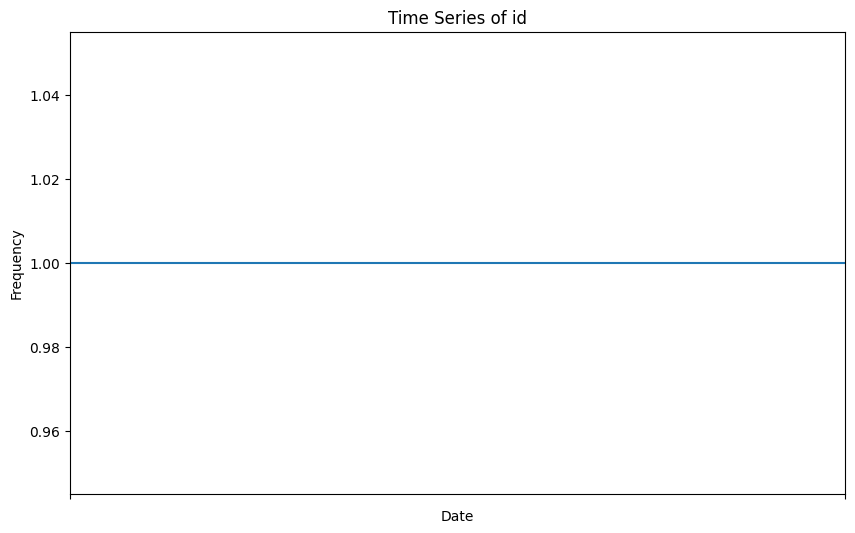




Analysis for column: channel_username
count                 10
unique                 1
top       tikvahethiopia
freq                  10
Name: channel_username, dtype: object




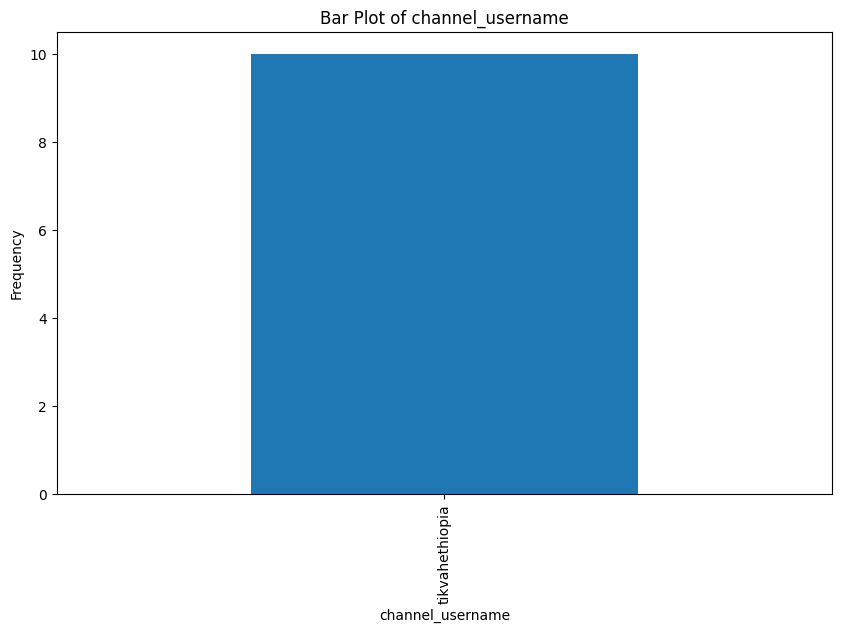




Analysis for column: message_id
count        10
unique        9
top       81123
freq          2
Name: message_id, dtype: object




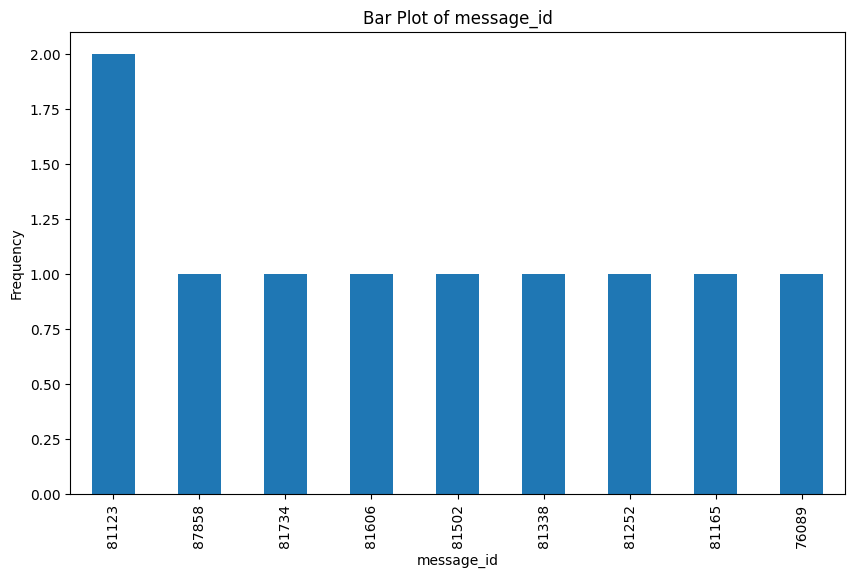




Analysis for column: message_link
count                                    10
unique                                    9
top       https://t.me/tikvahethiopia/81123
freq                                      2
Name: message_link, dtype: object




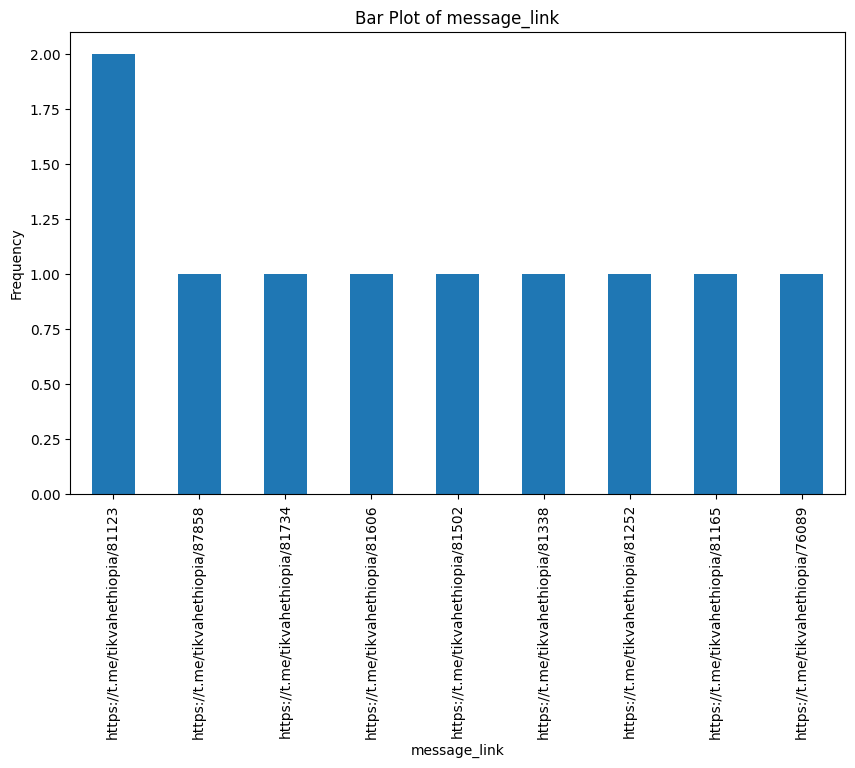




Analysis for column: views
count         10
unique        10
top       212588
freq           1
Name: views, dtype: object




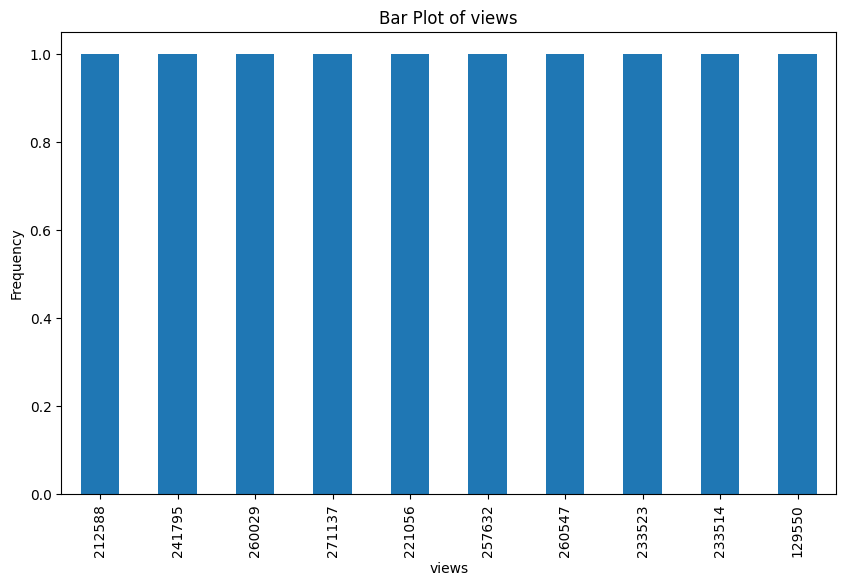




Analysis for column: message_content
count                                                    10
unique                                                    6
top       #Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...
freq                                                      3
Name: message_content, dtype: object




c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4840 (\N{ETHIOPIC SYLLABLE YA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4768 (\N{ETHIOPIC SYLLABLE GLOTTAL A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4706 (\N{ETHIOPIC SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4658 (\N{ETHIOPIC SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bageg\De

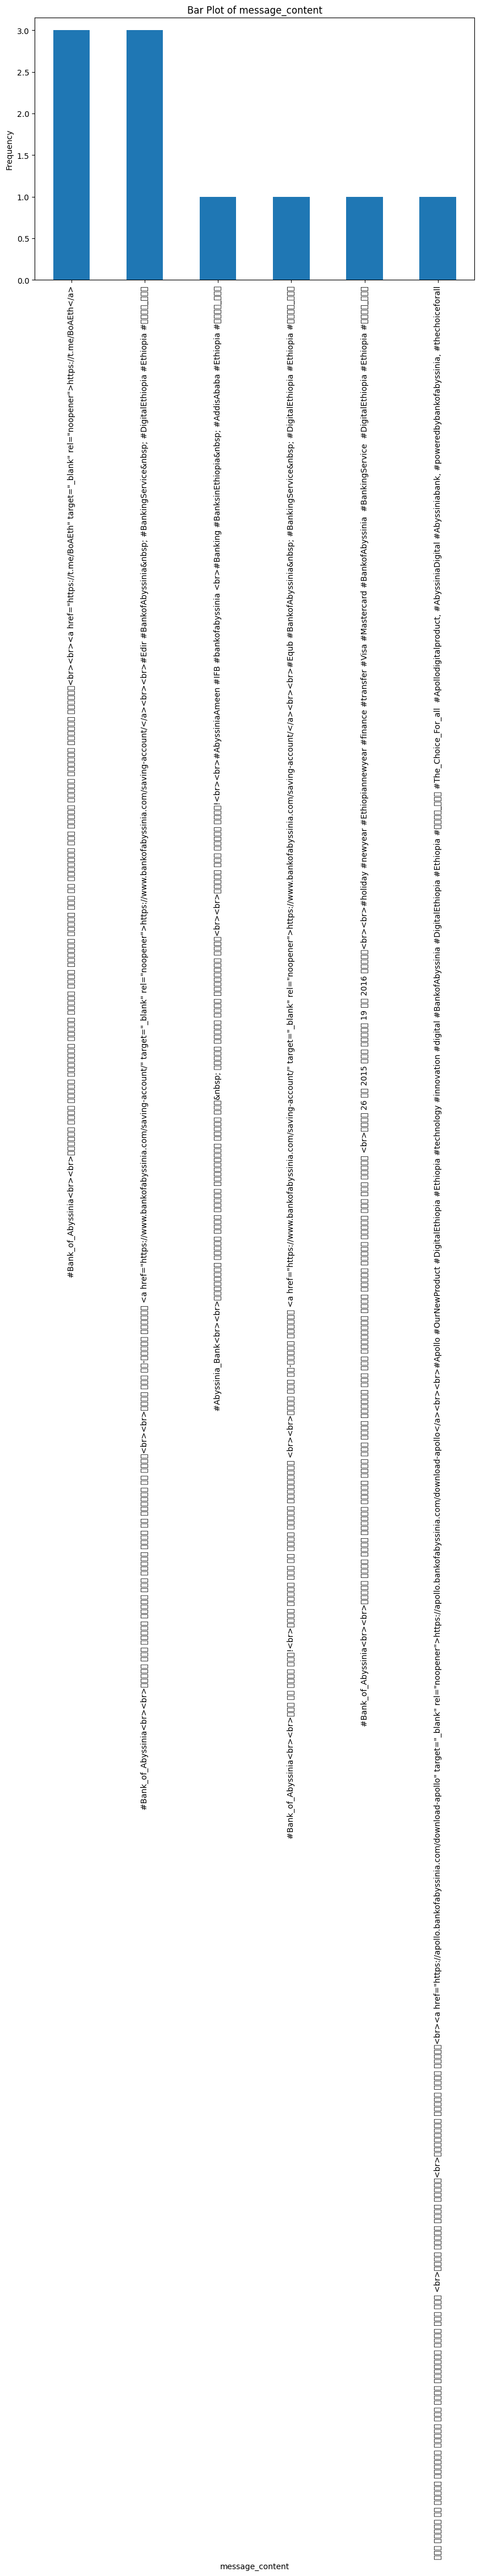




Analysis for column: date
count                        10
unique                        9
top       Aug 29, 2023 at 21:02
freq                          2
Name: date, dtype: object




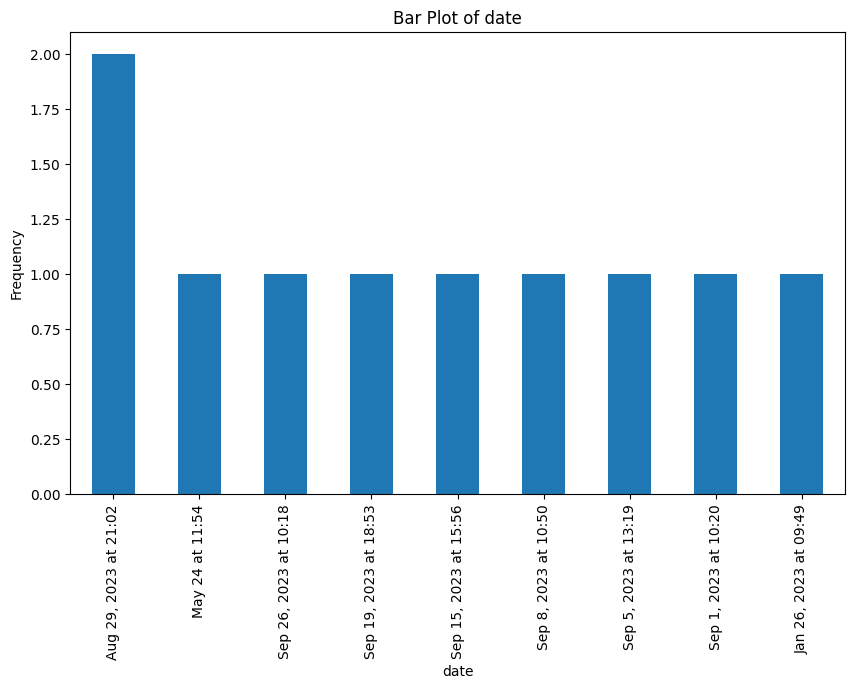




Analysis for column: image_html
count                                                    10
unique                                                    8
top       width: 800px; background-image: url("https://c...
freq                                                      2
Name: image_html, dtype: object




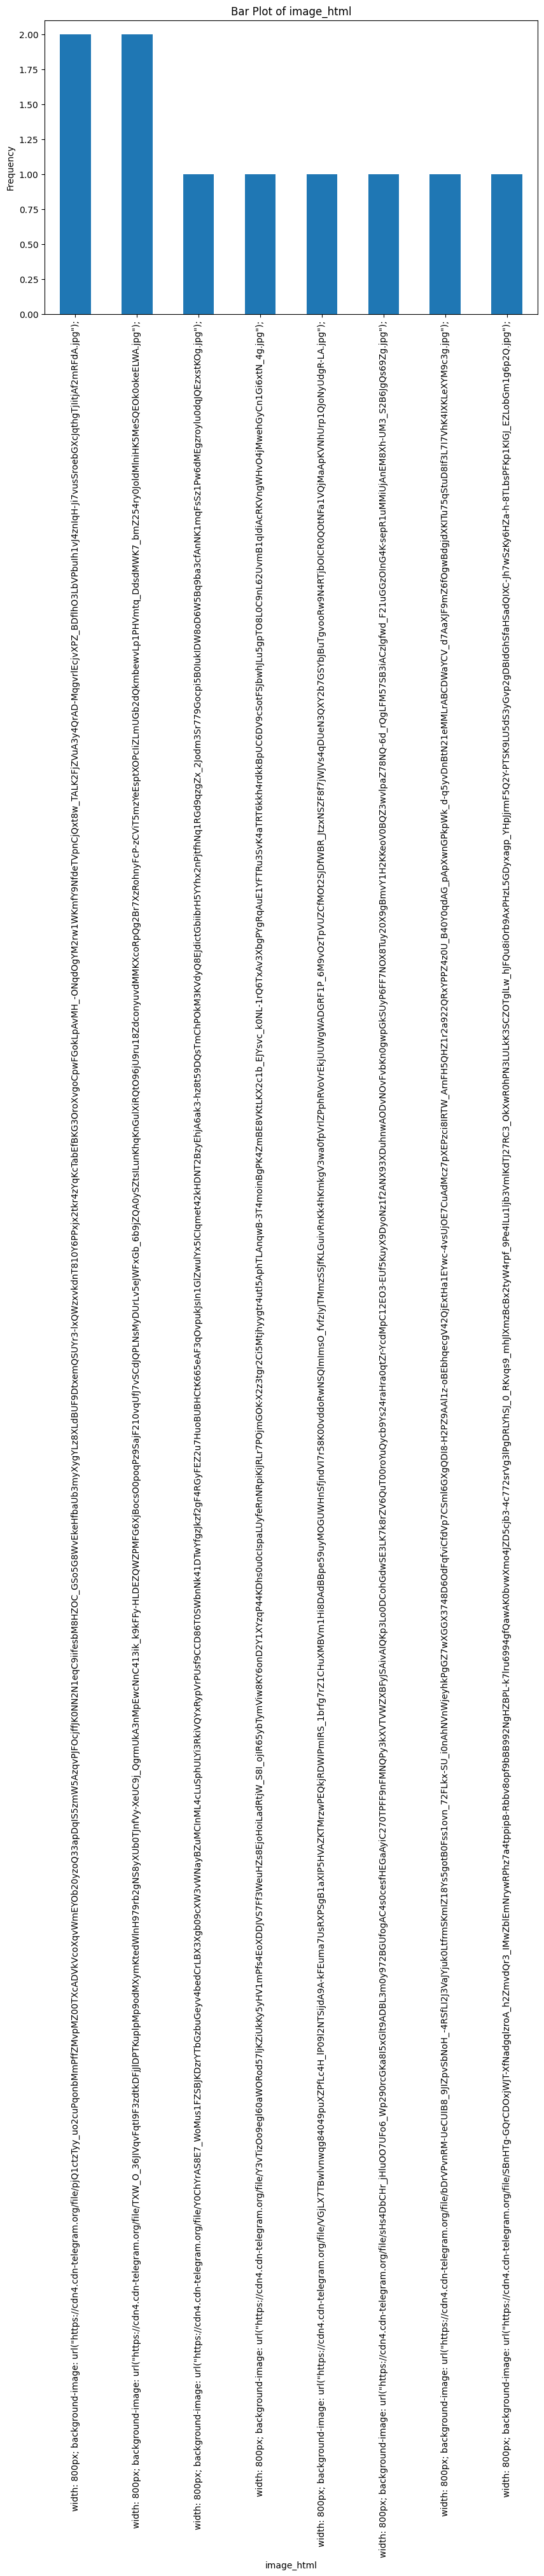




Analysis for column: banks
count      10
unique      1
top       BOA
freq       10
Name: banks, dtype: object




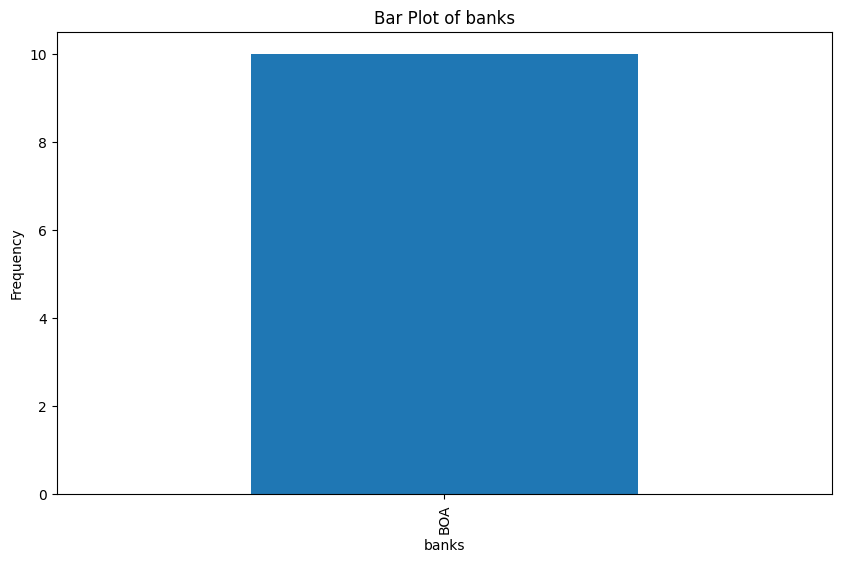




Analysis for column: time
count                     10
mean     2023-08-04 14:24:00
min      2023-01-09 00:00:00
25%      2023-06-01 00:00:00
50%      2023-08-29 00:00:00
75%      2023-09-18 00:00:00
max      2024-05-24 00:00:00
Name: time, dtype: object




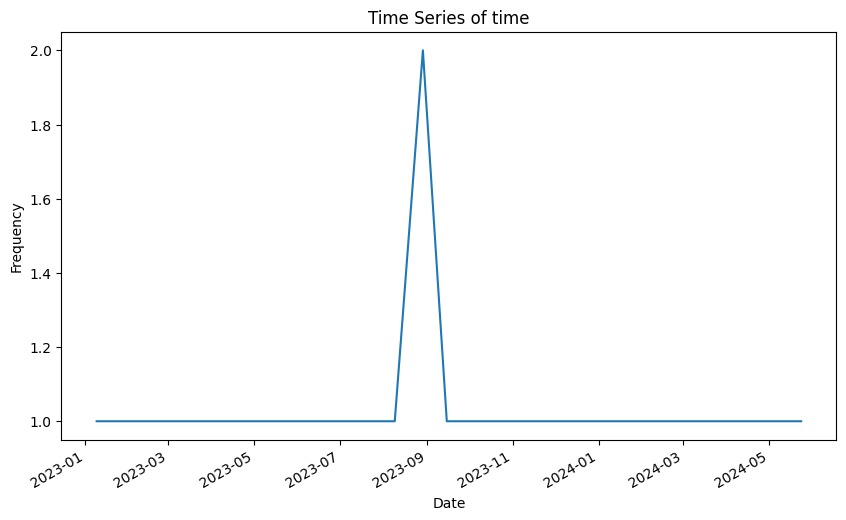

In [31]:
univariate_analysis(tikvahBankData)

Analysis for column: reviewid
count                                       10
unique                                      10
top       1c7fe538-d19f-40ac-9b8b-3e3458f8a26e
freq                                         1
Name: reviewid, dtype: object




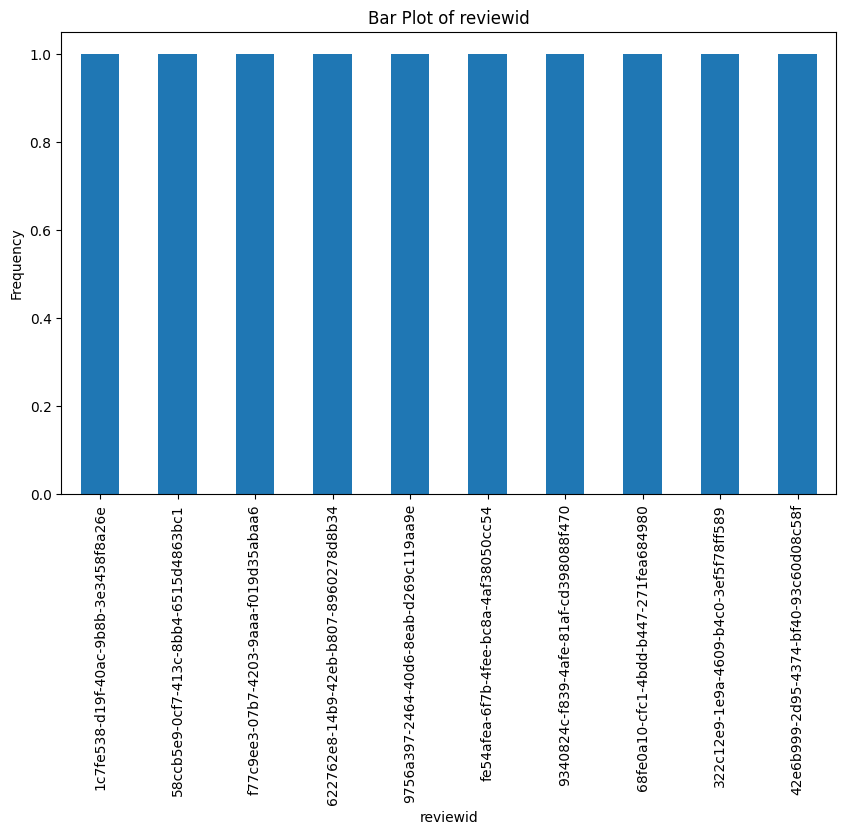




Analysis for column: username
count               10
unique              10
top       Ibsaa Carcar
freq                 1
Name: username, dtype: object




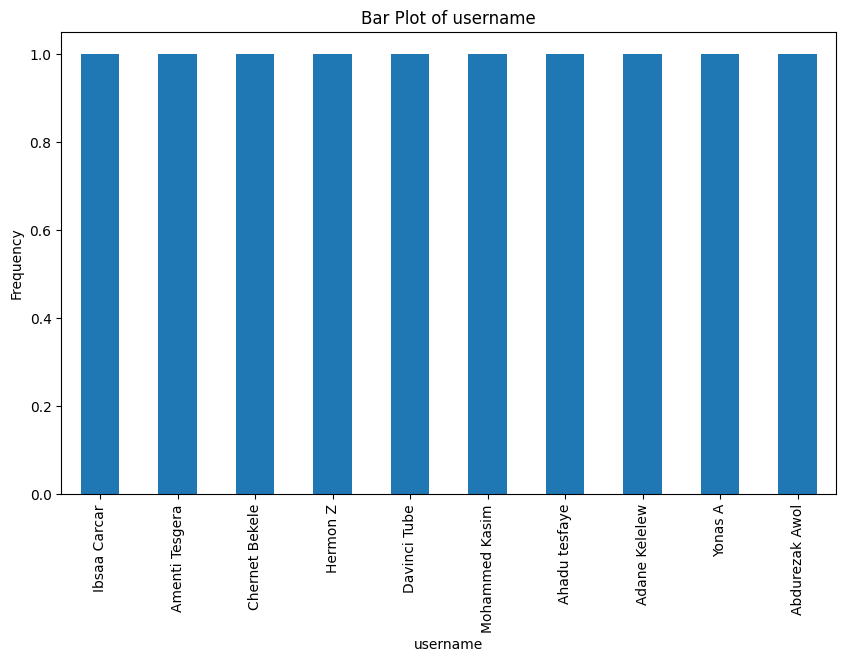




Analysis for column: userimage
count                                                    10
unique                                                   10
top       https://play-lh.googleusercontent.com/a-/ALV-U...
freq                                                      1
Name: userimage, dtype: object




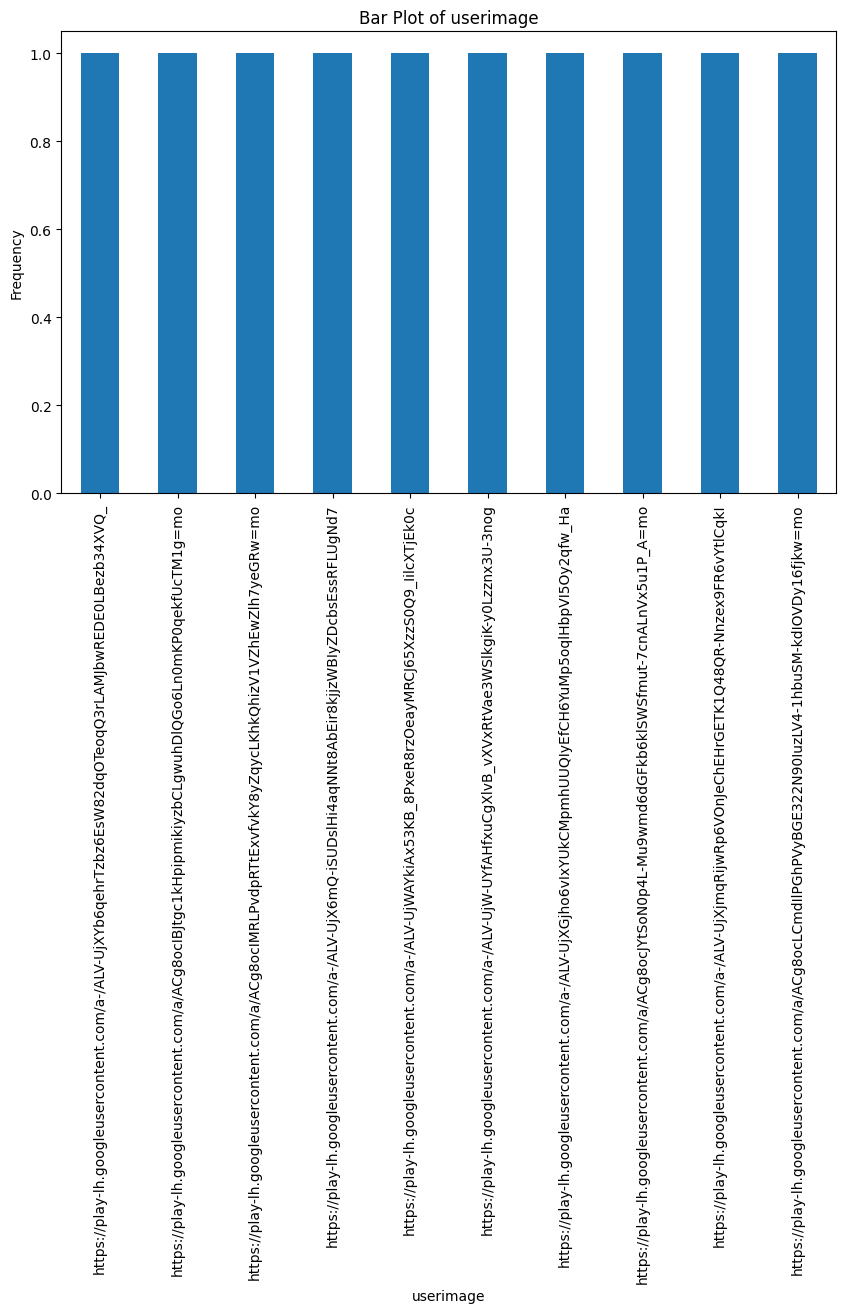




Analysis for column: content
count                     10
unique                    10
top       Very Very nice 👌 👍
freq                       1
Name: content, dtype: object




c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bageg\Desktop\10 Academy\TIKVAH-Google-Play-Analysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


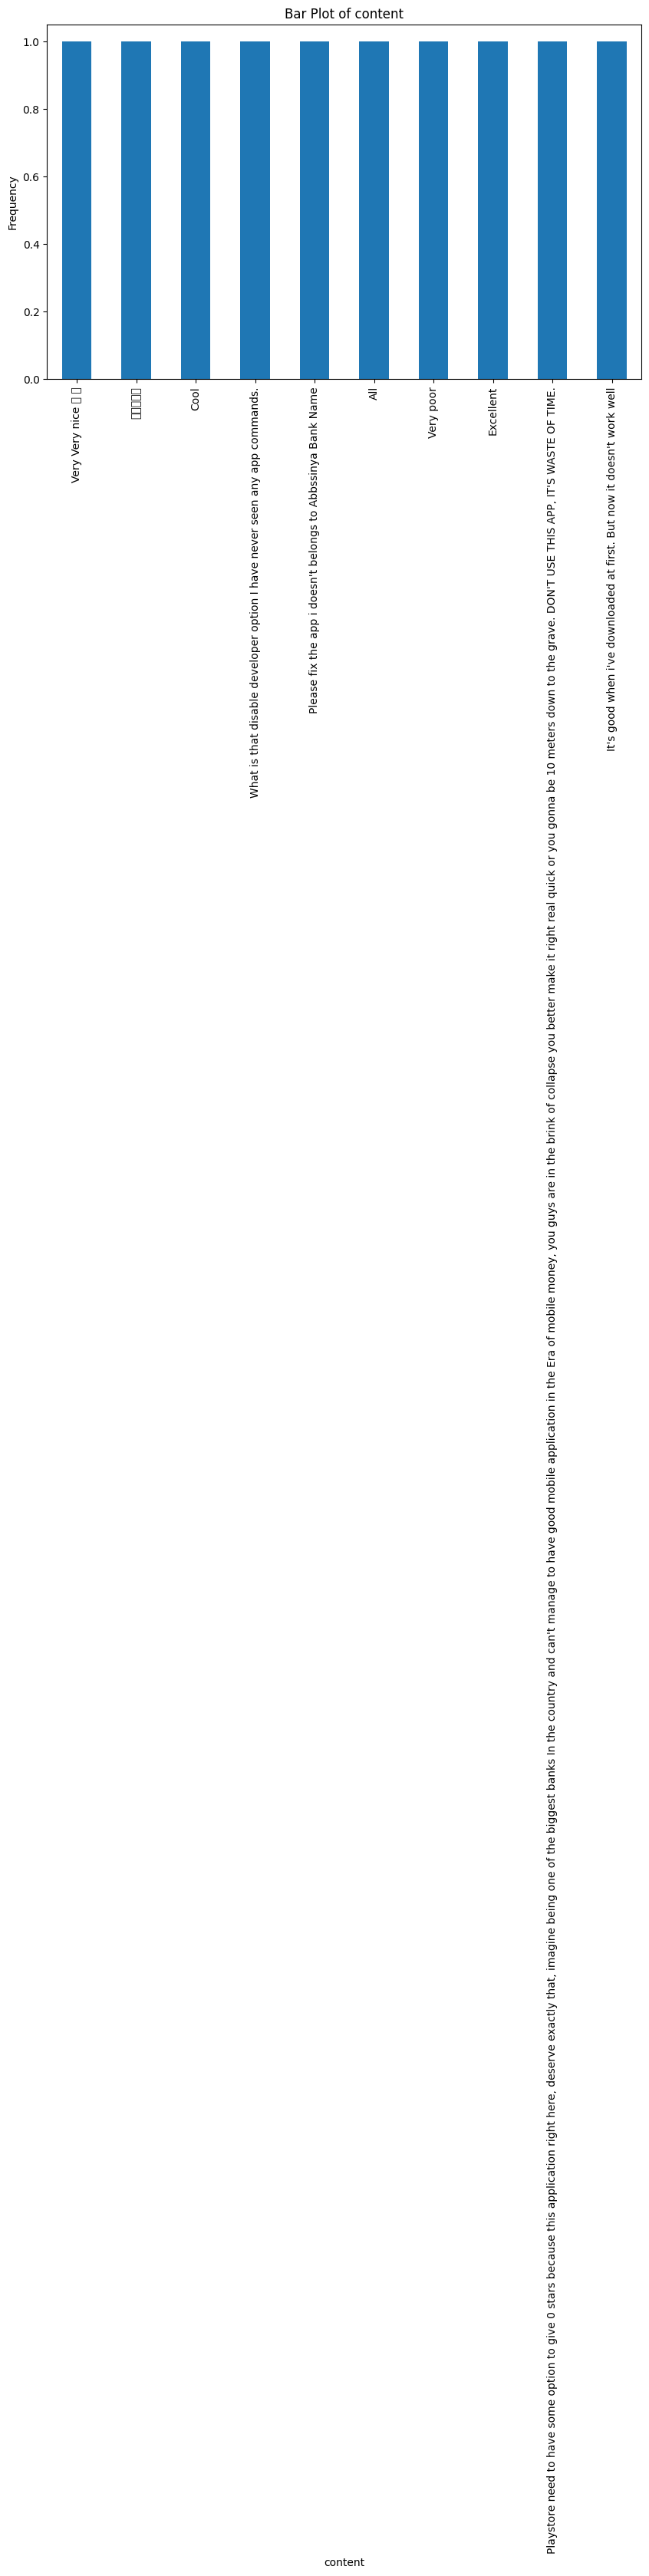




Analysis for column: score
count                               10
mean     1970-01-01 00:00:00.000000003
min      1970-01-01 00:00:00.000000001
25%      1970-01-01 00:00:00.000000001
50%      1970-01-01 00:00:00.000000003
75%      1970-01-01 00:00:00.000000005
max      1970-01-01 00:00:00.000000005
Name: score, dtype: object




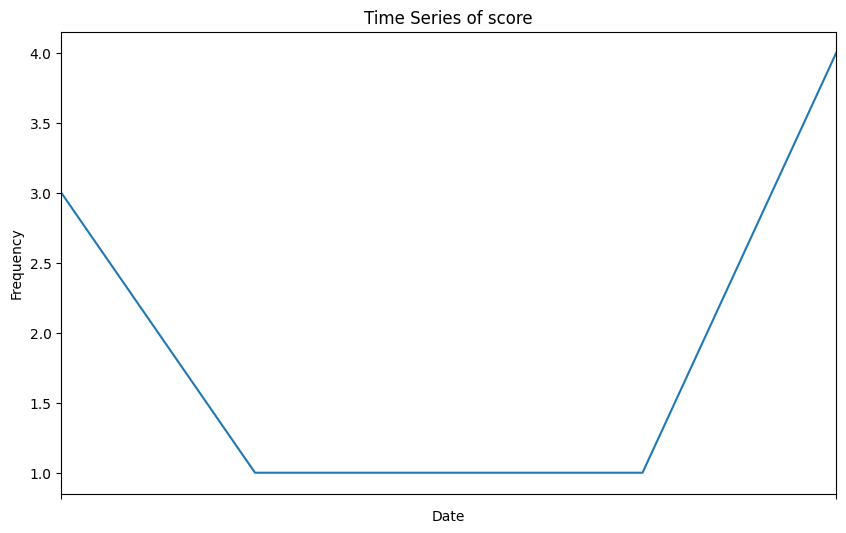




Analysis for column: thumbsupcount
count                               10
mean     1970-01-01 00:00:00.000000002
min                1970-01-01 00:00:00
25%                1970-01-01 00:00:00
50%                1970-01-01 00:00:00
75%                1970-01-01 00:00:00
max      1970-01-01 00:00:00.000000020
Name: thumbsupcount, dtype: object




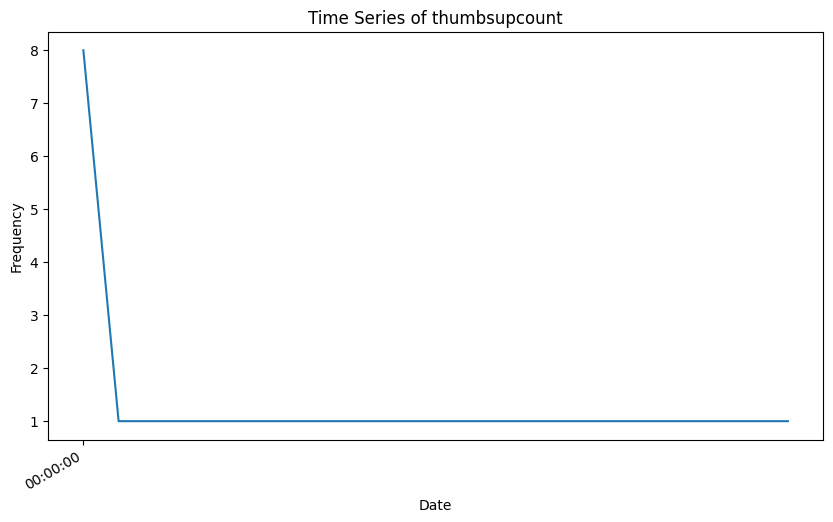




Analysis for column: reviewcreatedversion
count           10
unique           1
top       24.05.07
freq            10
Name: reviewcreatedversion, dtype: object




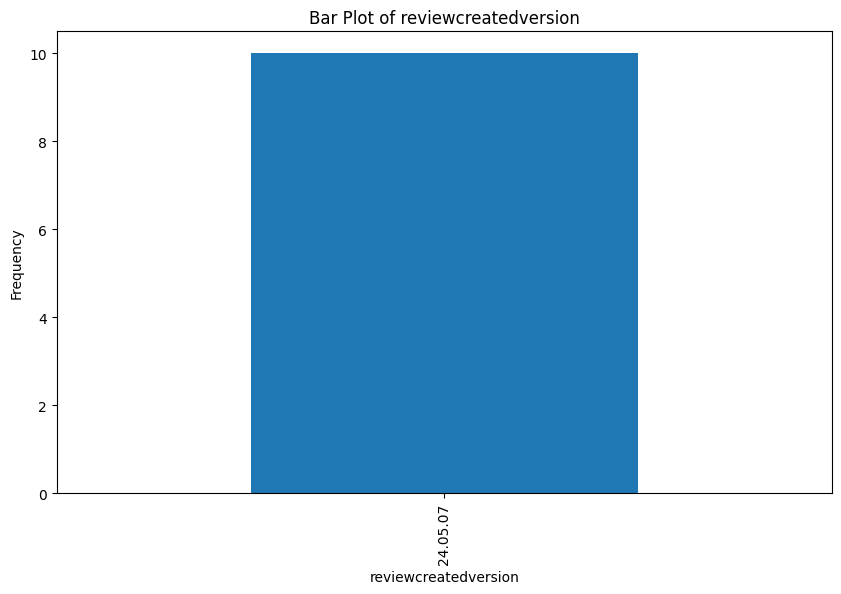




Analysis for column: createdat
count                               10
mean        2024-06-22 04:15:51.700000
min                2024-06-20 20:29:06
25%         2024-06-21 14:54:38.500000
50%                2024-06-21 23:20:13
75%      2024-06-22 12:17:55.750000128
max                2024-06-23 20:37:43
Name: createdat, dtype: object




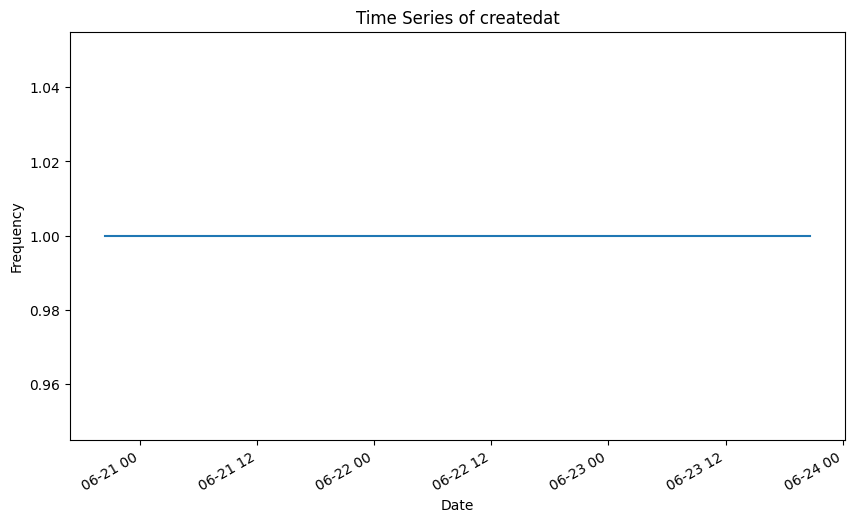




Analysis for column: appversion
count           10
unique           1
top       24.05.07
freq            10
Name: appversion, dtype: object




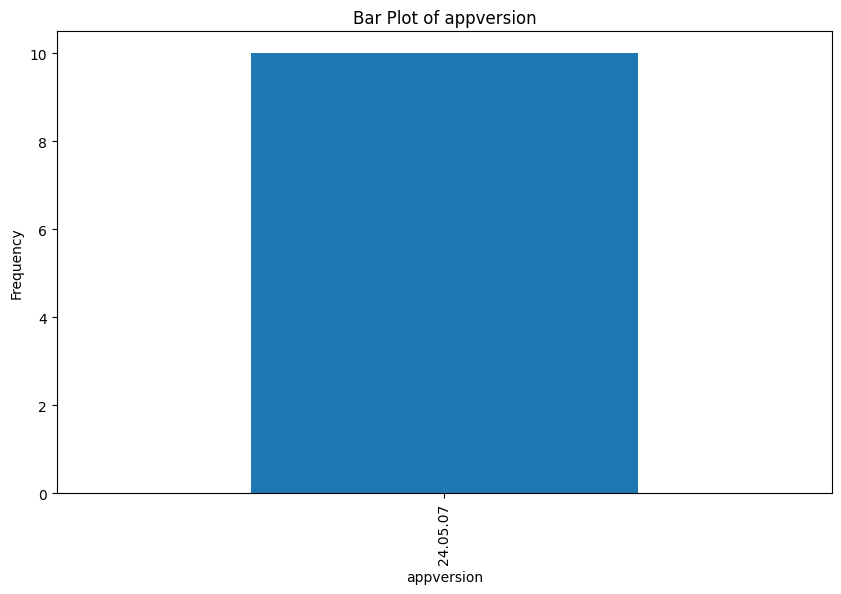




Analysis for column: bank
count      10
unique      1
top       BOA
freq       10
Name: bank, dtype: object




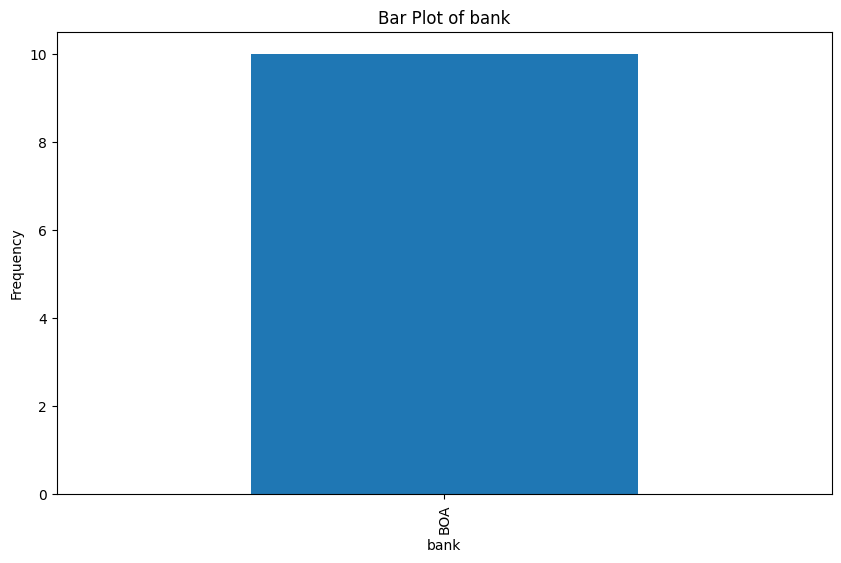

In [40]:
univariate_analysis(googleStoreReviewData)

Analysis for column: time
count       254
unique       24
top       18:00
freq         11
Name: time, dtype: object




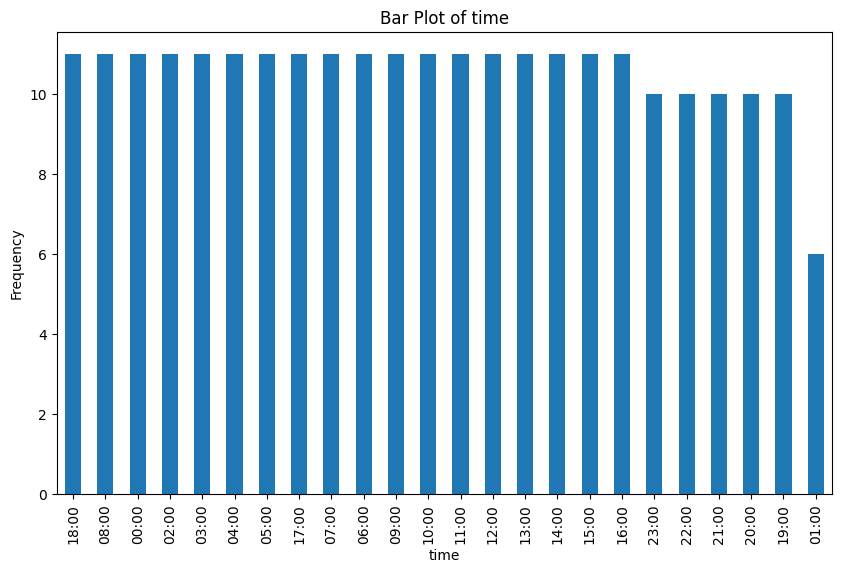




Analysis for column: subscriber_count
count                              254
mean     1970-01-01 00:00:00.000000041
min      1969-12-31 23:59:59.999999982
25%      1970-01-01 00:00:00.000000004
50%      1970-01-01 00:00:00.000000020
75%      1970-01-01 00:00:00.000000042
max      1970-01-01 00:00:00.000000848
Name: subscriber_count, dtype: object




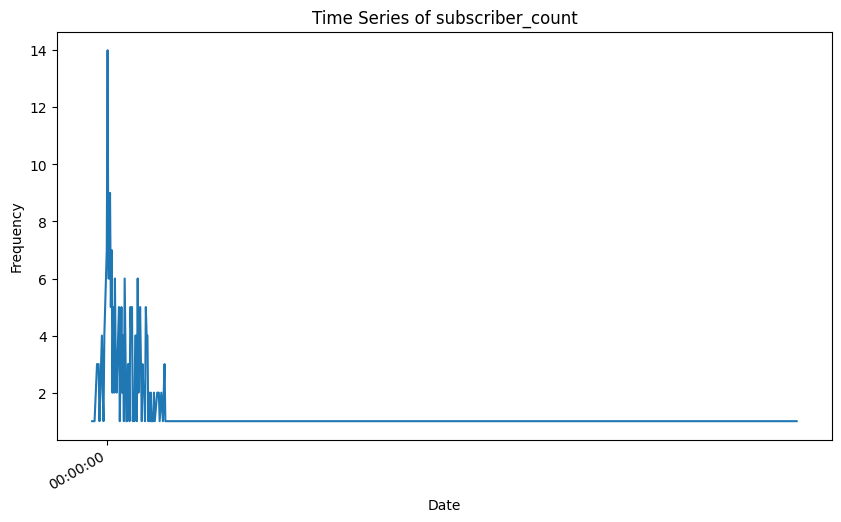




Analysis for column: date
count            254
unique            11
top       2024-05-20
freq              24
Name: date, dtype: object




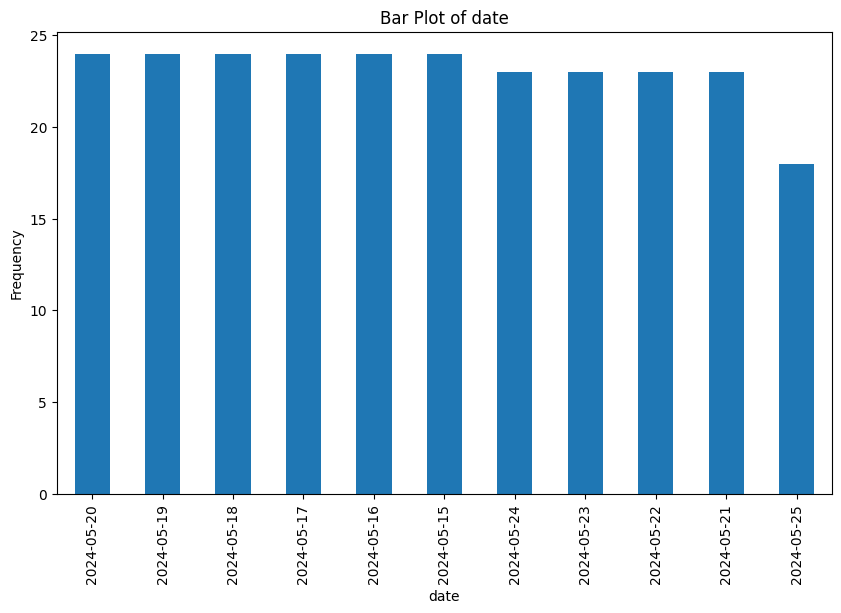

In [32]:
univariate_analysis(subscriberData)

# Bivariate Analysis

In [33]:
def bivariate_analysis(df, columns_to_consider, target_column):
    def analyze_pair(feature, target):
        print(f"Bivariate Analysis between: {feature.name} and {target.name}")
        
        if pd.api.types.is_numeric_dtype(feature):
            if pd.api.types.is_numeric_dtype(target):
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=feature, y=target, data=df)  # Use df here
                plt.title(f'Scatter Plot between {feature.name} and {target.name}')
                plt.xlabel(feature.name)
                plt.ylabel(target.name)
                plt.show()

                correlation = feature.corr(target)
                print(f'Correlation coefficient between {feature.name} and {target.name}: {correlation:.2f}')
            
            else:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=target, y=feature, data=df)  # Use df here
                plt.title(f'Box Plot between {target.name} and {feature.name}')
                plt.xlabel(target.name)
                plt.ylabel(feature.name)
                plt.show()
                
        else:
            if pd.api.types.is_numeric_dtype(target):
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=feature, y=target, data=df)  # Use df here
                plt.title(f'Box Plot between {feature.name} and {target.name}')
                plt.xlabel(feature.name)
                plt.ylabel(target.name)
                plt.show()
            else:
                plt.figure(figsize=(10, 6))
                sns.countplot(x=feature, hue=target, data=df)  # Use df here
                plt.title(f'Count Plot of {feature.name} grouped by {target.name}')
                plt.xlabel(feature.name)
                plt.ylabel('Count')
                plt.show()

        print("\n\n")

    for column in columns_to_consider:
        if column != target_column:
            analyze_pair(df[column], df[target_column]) 

Bivariate Analysis between: views and date


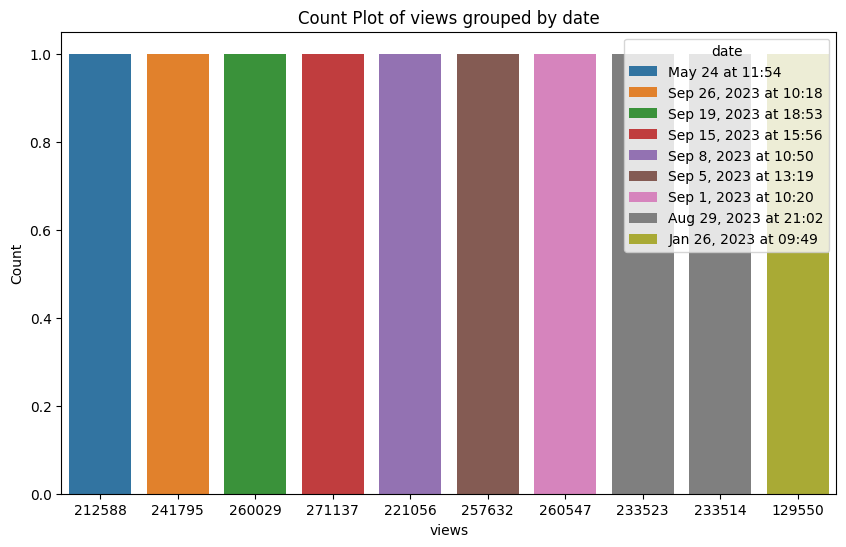




Bivariate Analysis between: banks and date


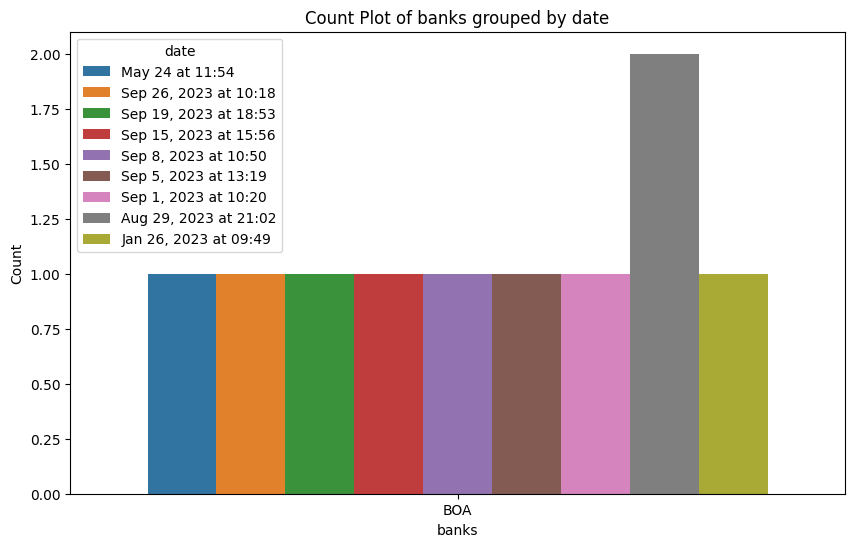

In [34]:
bivariate_analysis(tikvahBankData, ['views', 'banks'], 'date')

Bivariate Analysis between: views and banks


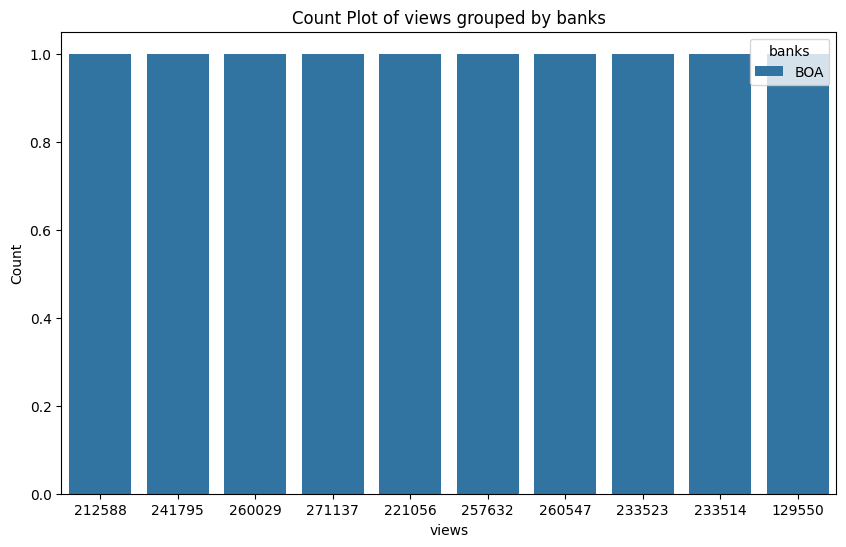

In [35]:
bivariate_analysis(tikvahBankData, ['views'], 'banks')

Bivariate Analysis between: username and score


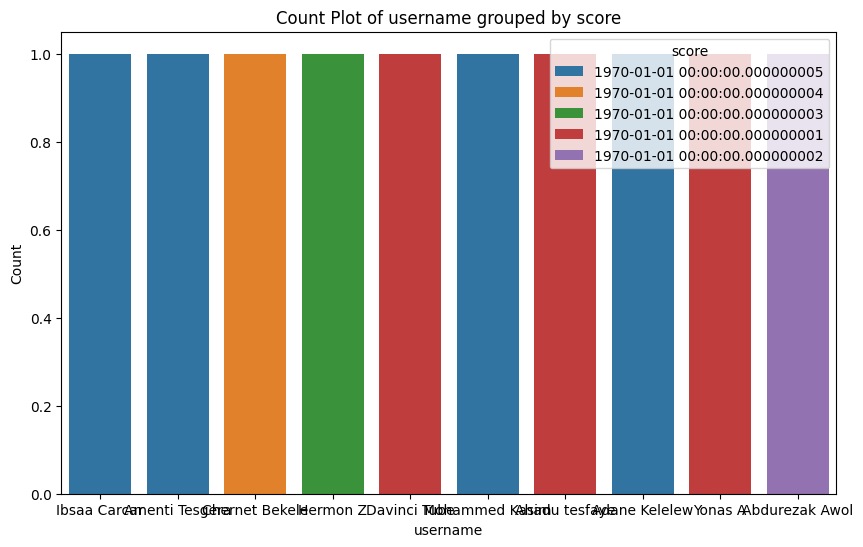




Bivariate Analysis between: createdat and score


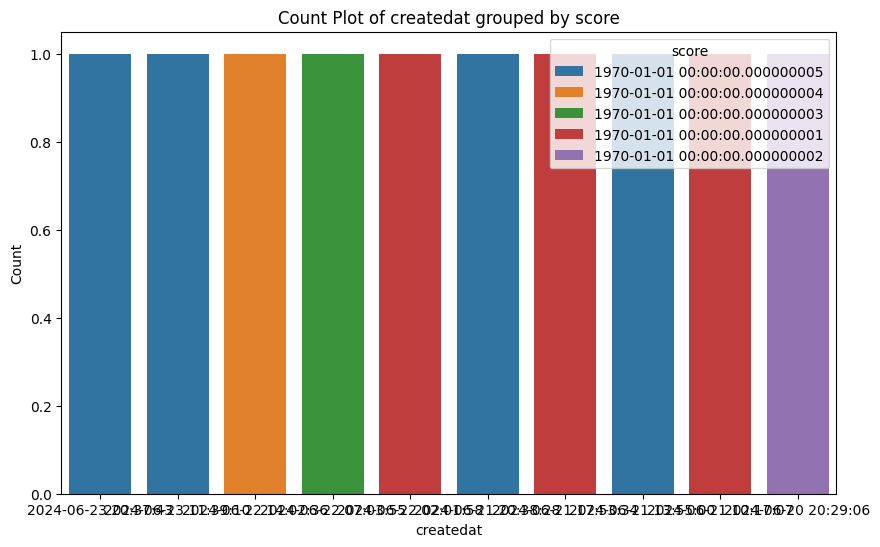




Bivariate Analysis between: appversion and score


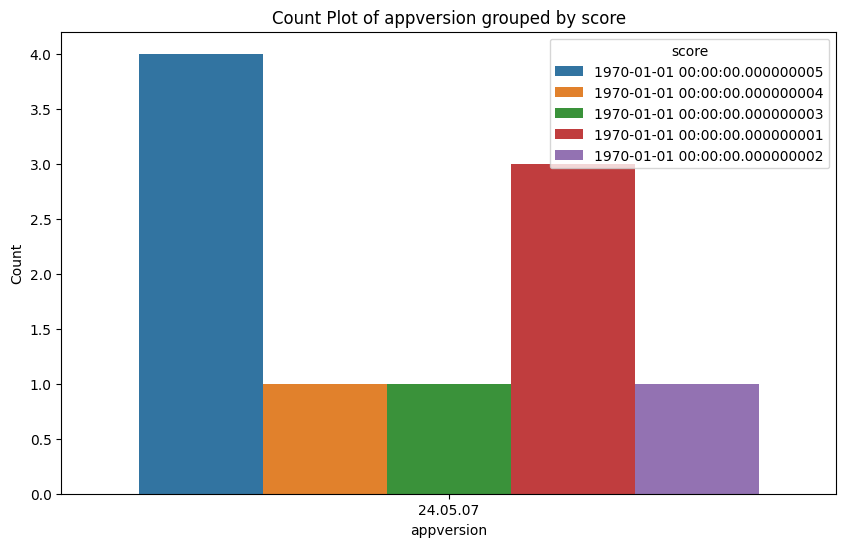




Bivariate Analysis between: reviewcreatedversion and score


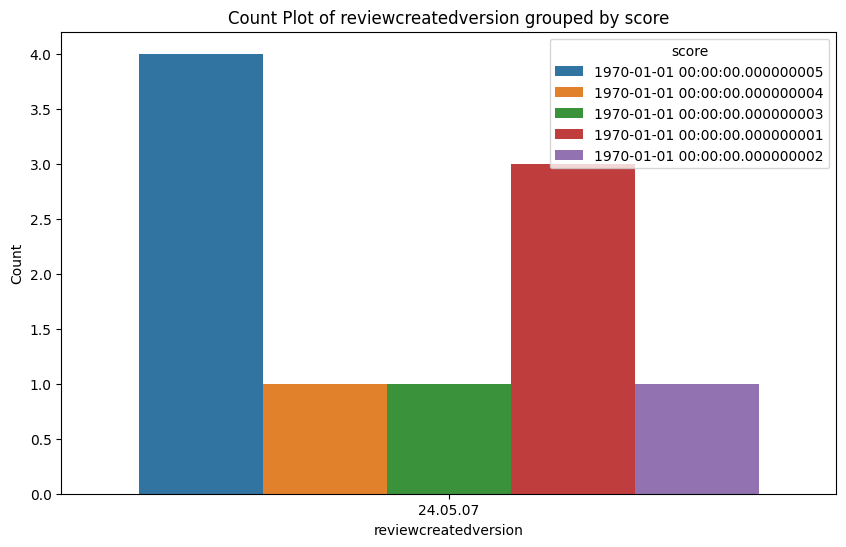




Bivariate Analysis between: bank and score


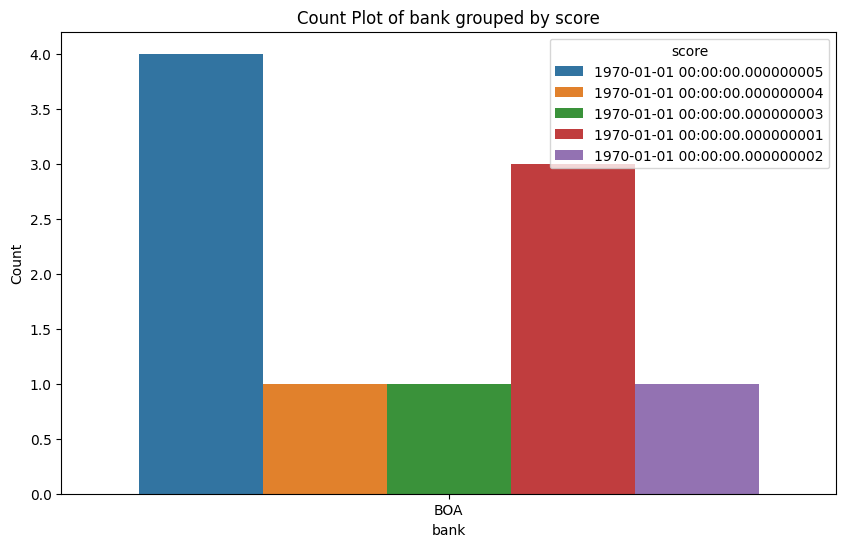




Bivariate Analysis between: username and thumbsupcount


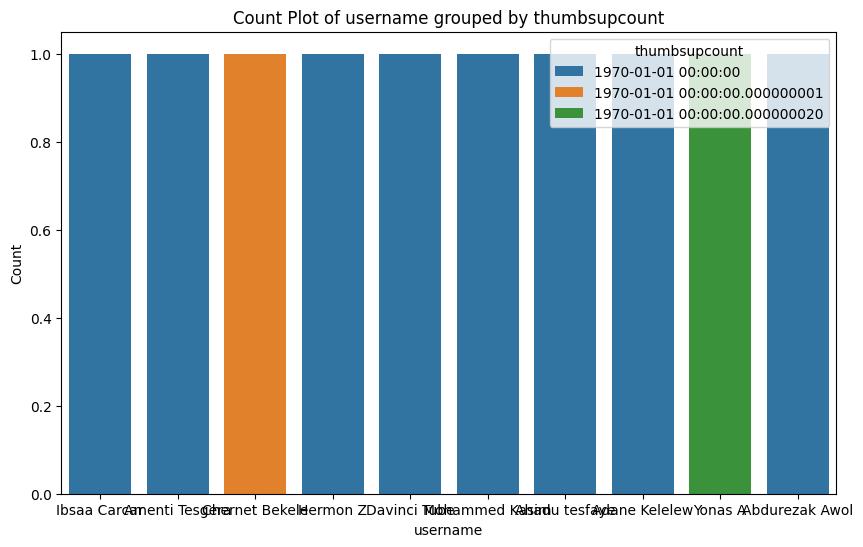




Bivariate Analysis between: createdat and thumbsupcount


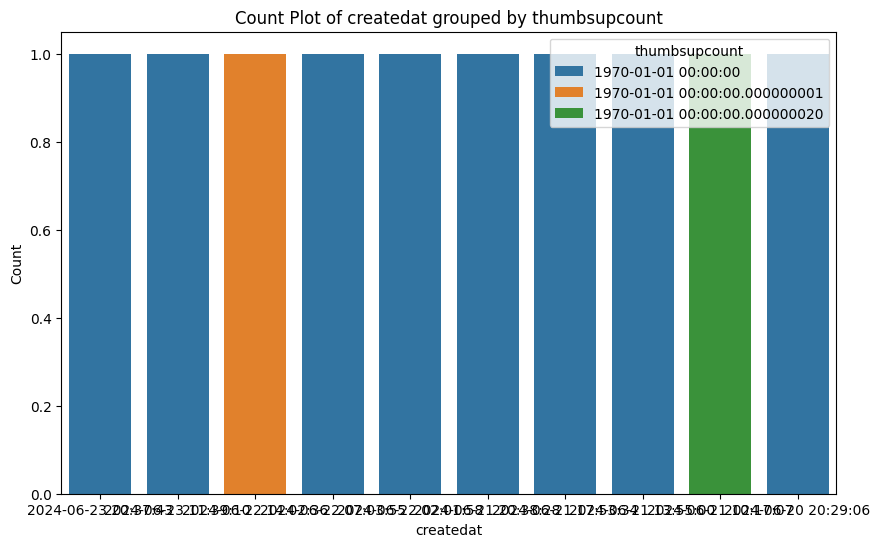




Bivariate Analysis between: appversion and thumbsupcount


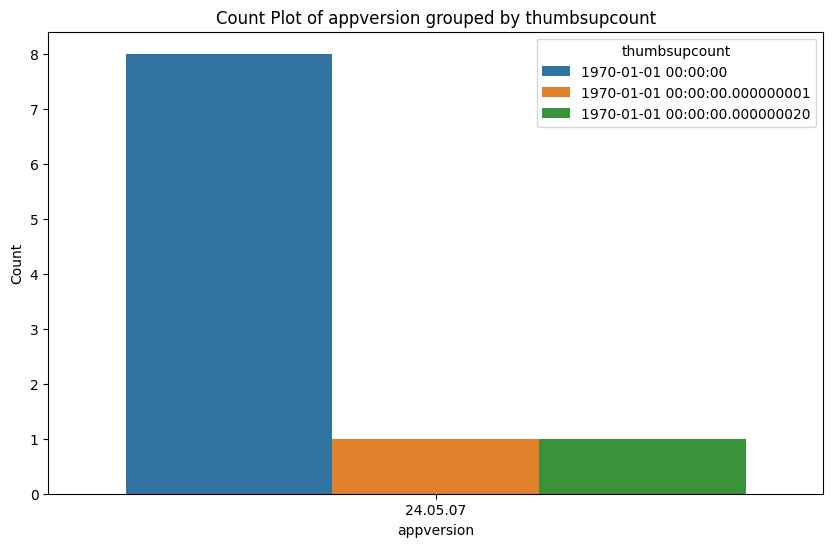




Bivariate Analysis between: reviewcreatedversion and thumbsupcount


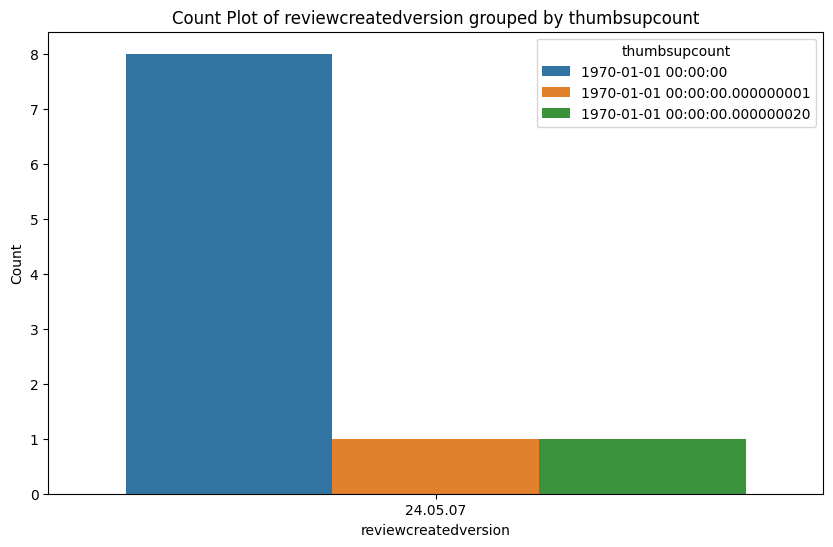




Bivariate Analysis between: bank and thumbsupcount


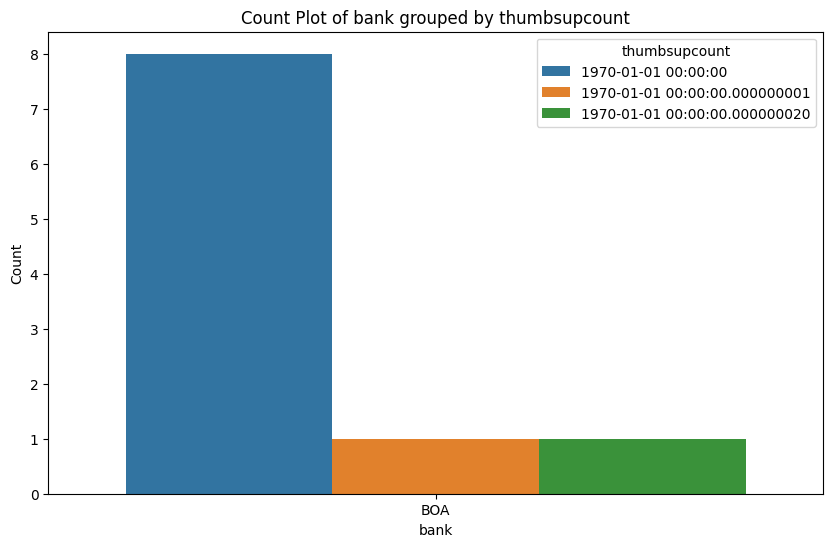

In [36]:
bivariate_analysis(googleStoreReviewData,['username', 'createdat','appversion', 'reviewcreatedversion','bank'],'score')
bivariate_analysis(googleStoreReviewData,['username', 'createdat','appversion', 'reviewcreatedversion','bank'],'thumbsupcount')

In [37]:
def bivariate_analysis_line(df, column_to_plot, target_column):
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=column_to_plot.name, y=target_column.name, data=df)
    plt.title(f'Line Plot of {target_column.name} over {column_to_plot.name}', fontsize=16)
    plt.xlabel(column_to_plot.name, fontsize=14)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.ylabel(target_column.name, fontsize=14)
    plt.grid(True)
    plt.show()

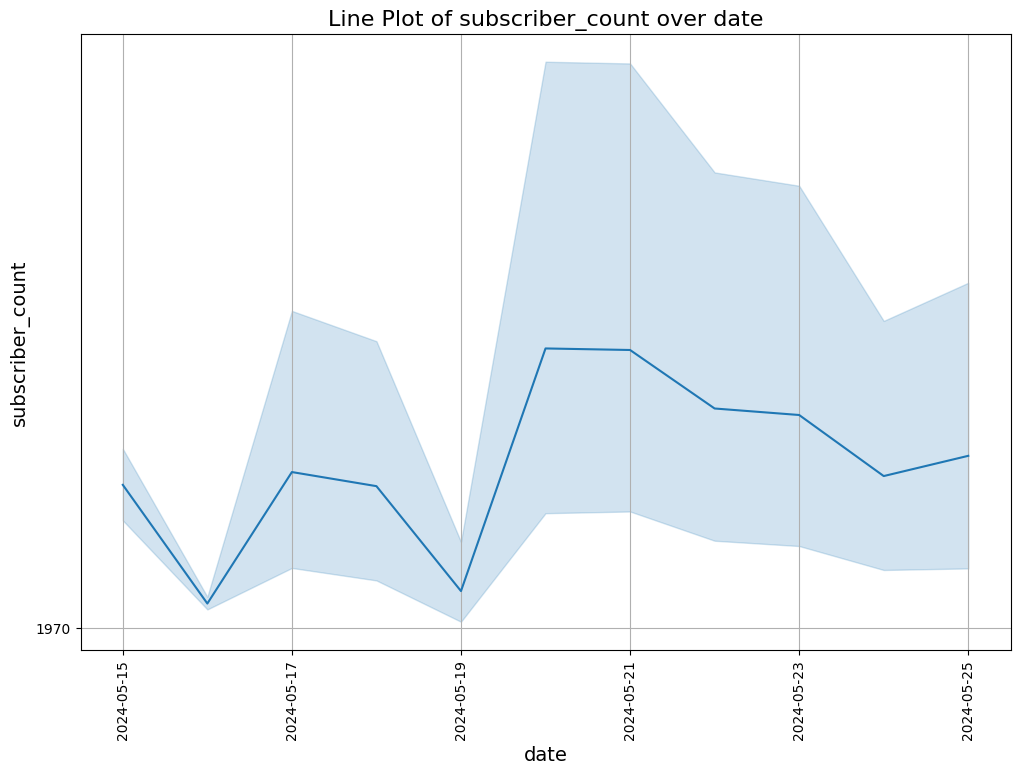

In [57]:
bivariate_analysis_line(subscriberData,subscriberData['date'],subscriberData['subscriber_count'], )

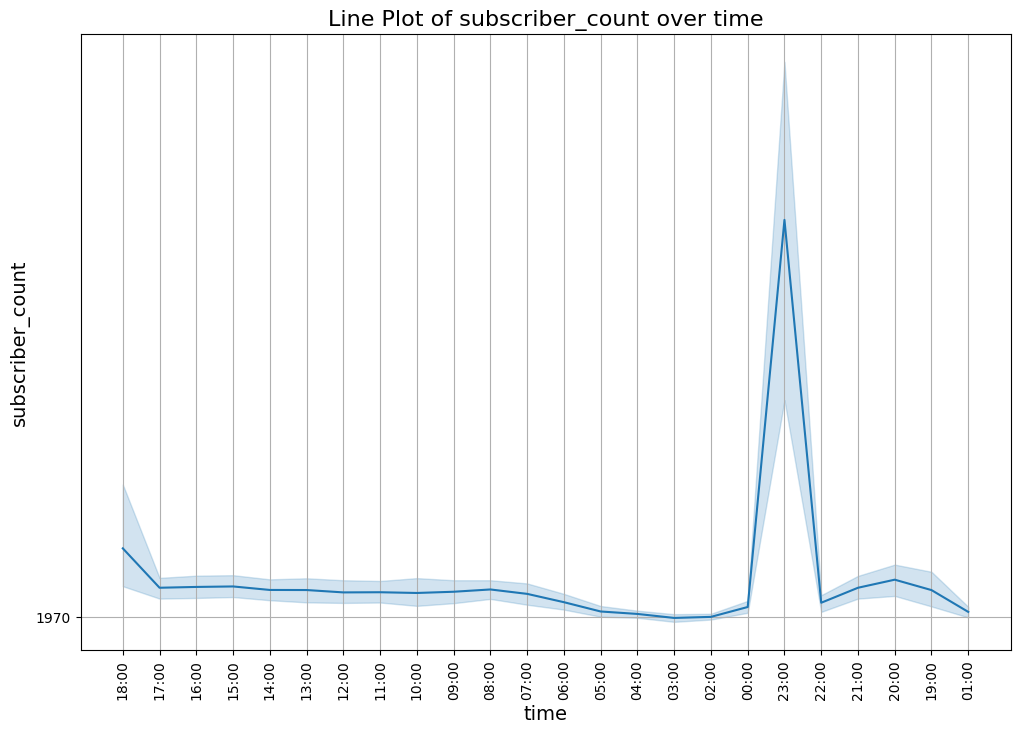

In [38]:
bivariate_analysis_line(subscriberData,subscriberData['time'],subscriberData['subscriber_count'], )

# Data Enrichment

In [39]:
def analyze_sentiment(text):
    """
    Function to perform sentiment analysis using TextBlob.
    
    Parameters:
    - text: The text data to analyze.
    
    Returns:
    - sentiment_score: The sentiment score of the text.
      Positive values indicate positive sentiment, negative values indicate negative sentiment.
    """
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

def add_sentiment_column(df, text_column):
    """
    Function to add a new column for sentiment analysis using TextBlob.
    
    Parameters:
    - df: The DataFrame containing the text data.
    - text_column: The name of the column containing the text data.
    
    Returns:
    - df_with_sentiment: The DataFrame with the sentiment analysis results added as a new column.
    """
    df_with_sentiment = df.copy()
    df_with_sentiment['sentiment_score'] = df_with_sentiment[text_column].apply(analyze_sentiment)
    return df_with_sentiment

def compute_polarity(sentiment_score):
    """
    Function to compute polarity based on sentiment score.
    
    Parameters:
    - sentiment_score: The sentiment score of the text.
    
    Returns:
    - polarity: The polarity of the sentiment analysis result.
      Polarity values range from -1 (most negative) to 1 (most positive).
    """
    polarity = 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'
    return polarity

# Example usage:
# df['sentiment_polarity'] = df['sentiment_score'].apply(compute_polarity)




In [40]:
googleStoreReviewData = add_sentiment_column(googleStoreReviewData, 'content')

In [41]:
googleStoreReviewData.sample(10)

,reviewid,username,userimage,content,score,thumbsupcount,reviewcreatedversion,createdat,appversion,bank,sentiment_score
5,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,All,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-21 20:38:28,24.05.07,BOA,0.000000
2,f77c9ee3-07b7-4203-9aaa-f019d35abaa6,Chernet Bekele,https://play-lh.googleusercontent.com/a/ACg8oc...,Cool,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000001,24.05.07,2024-06-22 14:02:36,24.05.07,BOA,0.350000
9,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,It's good when i've downloaded at first. But n...,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000000,24.05.07,2024-06-20 20:29:06,24.05.07,BOA,0.475000
0,1c7fe538-d19f-40ac-9b8b-3e3458f8a26e,Ibsaa Carcar,https://play-lh.googleusercontent.com/a-/ALV-U...,Very Very nice 👌 👍,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-23 20:37:43,24.05.07,BOA,0.780000
3,622762e8-14b9-42eb-b807-8960278d8b34,Hermon Z,https://play-lh.googleusercontent.com/a-/ALV-U...,What is that disable developer option I have n...,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000000,24.05.07,2024-06-22 07:03:55,24.05.07,BOA,0.000000
4,9756a397-2464-40d6-8eab-d269c119aa9e,Davinci Tube,https://play-lh.googleusercontent.com/a-/ALV-U...,Please fix the app i doesn't belongs to Abbssi...,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,24.05.07,2024-06-22 02:01:58,24.05.07,BOA,0.000000
1,58ccb5e9-0cf7-413c-8bb4-6515d4863bc1,Amenti Tesgera,https://play-lh.googleusercontent.com/a/ACg8oc...,🥰🥰🥰🥰🥰,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-23 11:39:10,24.05.07,BOA,0.000000
7,68fe0a10-cfc1-4bdd-b447-271fea684980,Adane Kelelew,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-21 13:55:00,24.05.07,BOA,1.000000
8,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,Playstore need to have some option to give 0 s...,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000020,24.05.07,2024-06-21 10:17:07,24.05.07,BOA,0.270734
6,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Very poor,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,24.05.07,2024-06-21 17:53:34,24.05.07,BOA,-0.520000


In [42]:
googleStoreReviewData['sentiment_polarity'] = googleStoreReviewData['sentiment_score'].apply(compute_polarity)

In [43]:
googleStoreReviewData.sample(10)

,reviewid,username,userimage,content,score,thumbsupcount,reviewcreatedversion,createdat,appversion,bank,sentiment_score,sentiment_polarity
0,1c7fe538-d19f-40ac-9b8b-3e3458f8a26e,Ibsaa Carcar,https://play-lh.googleusercontent.com/a-/ALV-U...,Very Very nice 👌 👍,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-23 20:37:43,24.05.07,BOA,0.780000,positive
6,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Very poor,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,24.05.07,2024-06-21 17:53:34,24.05.07,BOA,-0.520000,negative
7,68fe0a10-cfc1-4bdd-b447-271fea684980,Adane Kelelew,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-21 13:55:00,24.05.07,BOA,1.000000,positive
9,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,It's good when i've downloaded at first. But n...,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000000,24.05.07,2024-06-20 20:29:06,24.05.07,BOA,0.475000,positive
5,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,All,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-21 20:38:28,24.05.07,BOA,0.000000,neutral
4,9756a397-2464-40d6-8eab-d269c119aa9e,Davinci Tube,https://play-lh.googleusercontent.com/a-/ALV-U...,Please fix the app i doesn't belongs to Abbssi...,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,24.05.07,2024-06-22 02:01:58,24.05.07,BOA,0.000000,neutral
1,58ccb5e9-0cf7-413c-8bb4-6515d4863bc1,Amenti Tesgera,https://play-lh.googleusercontent.com/a/ACg8oc...,🥰🥰🥰🥰🥰,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000000,24.05.07,2024-06-23 11:39:10,24.05.07,BOA,0.000000,neutral
2,f77c9ee3-07b7-4203-9aaa-f019d35abaa6,Chernet Bekele,https://play-lh.googleusercontent.com/a/ACg8oc...,Cool,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000001,24.05.07,2024-06-22 14:02:36,24.05.07,BOA,0.350000,positive
8,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,Playstore need to have some option to give 0 s...,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000020,24.05.07,2024-06-21 10:17:07,24.05.07,BOA,0.270734,positive
3,622762e8-14b9-42eb-b807-8960278d8b34,Hermon Z,https://play-lh.googleusercontent.com/a-/ALV-U...,What is that disable developer option I have n...,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000000,24.05.07,2024-06-22 07:03:55,24.05.07,BOA,0.000000,neutral


Bivariate Analysis between: username and sentiment_polarity


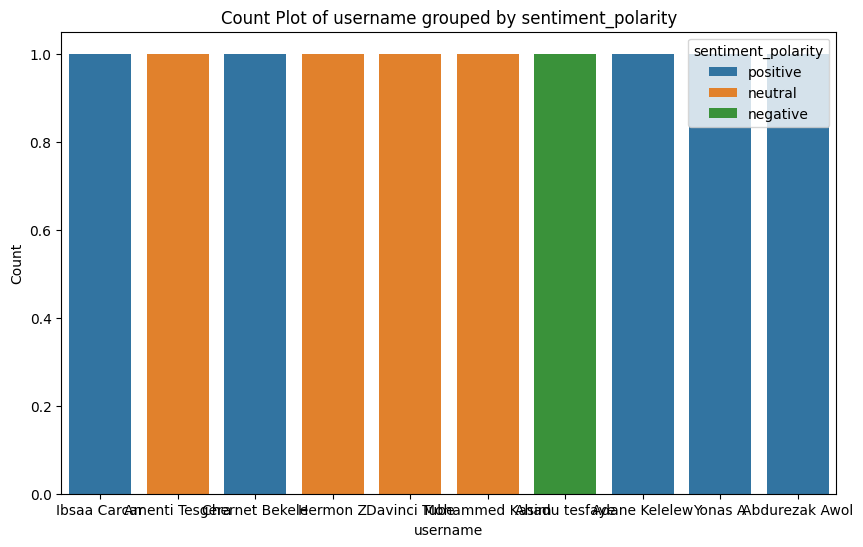




Bivariate Analysis between: createdat and sentiment_polarity


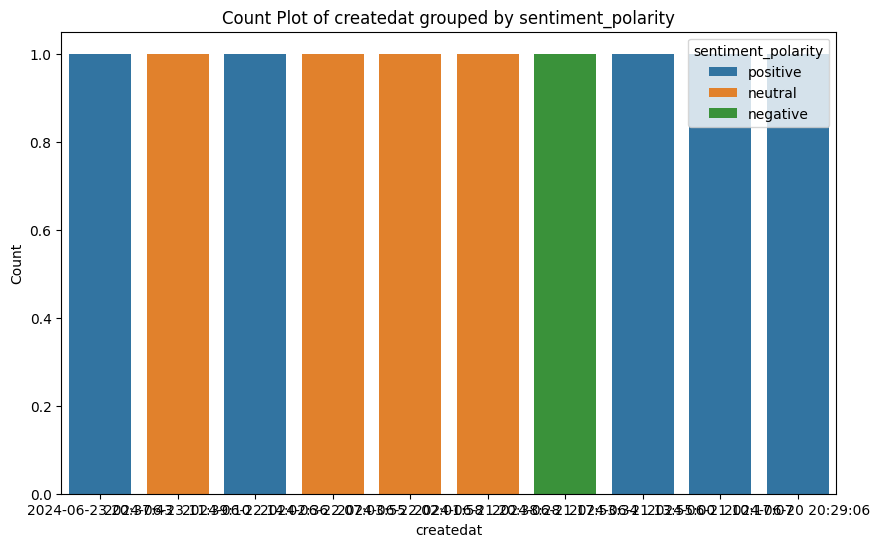




Bivariate Analysis between: appversion and sentiment_polarity


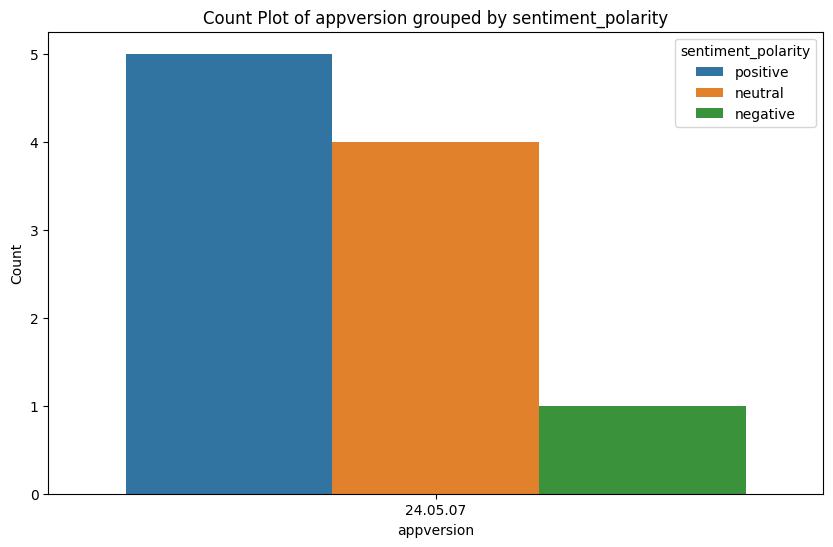




Bivariate Analysis between: reviewcreatedversion and sentiment_polarity


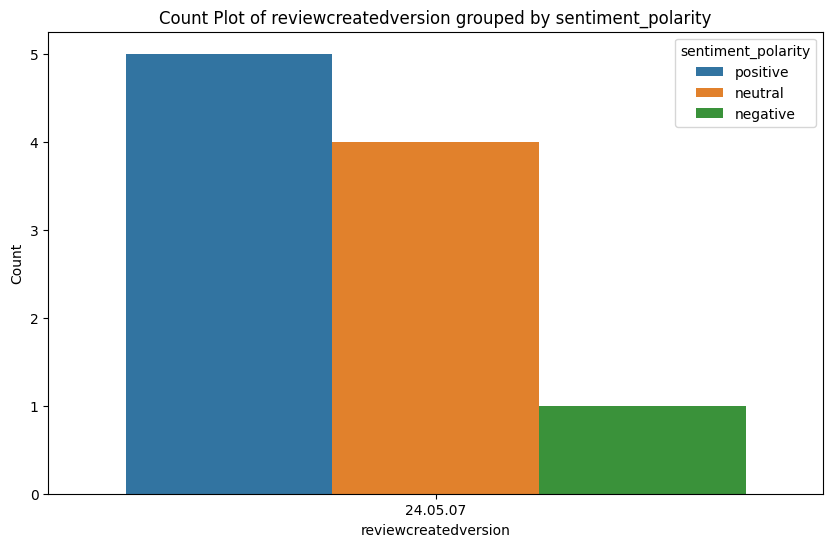




Bivariate Analysis between: bank and sentiment_polarity


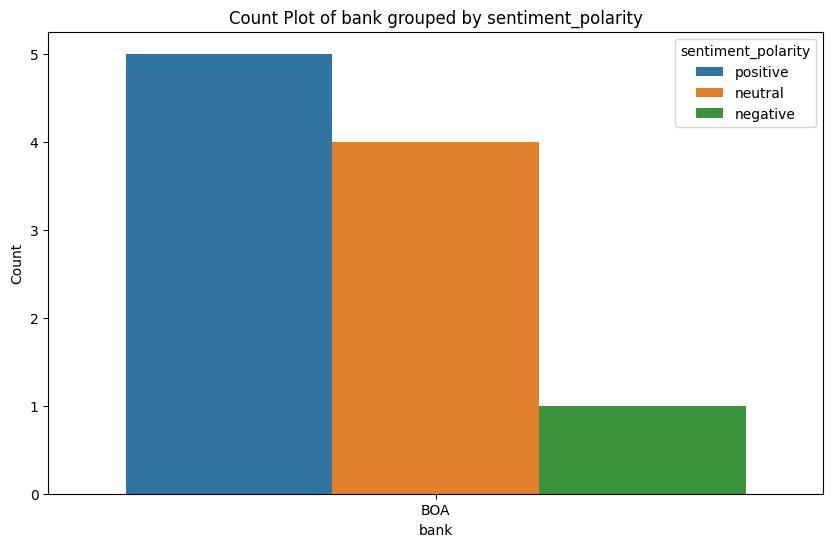

In [44]:
bivariate_analysis(googleStoreReviewData,['username', 'createdat','appversion', 'reviewcreatedversion','bank'],'sentiment_polarity')

# Correlation between different datasets

In [45]:
def compute_correlation(df1, df2, column1, column2):
    """
    Function to compute the correlation between two datasets based on specified columns.
    
    Parameters:
    - df1: The first DataFrame.
    - df2: The second DataFrame.
    - column1: The column in the first DataFrame to compute correlation with.
    - column2: The column in the second DataFrame to compute correlation with.
    
    Returns:
    - correlation_coefficient: The correlation coefficient between the specified columns.
    """
    correlation_coefficient = df1[column1].corr(df2[column2])

    return correlation_coefficient



In [46]:
correlation_coefficient = compute_correlation(tikvahBankData, googleStoreReviewData, 'views', 'score')
correlation_coefficient

0.19141851208605026

In [47]:
correlation_coefficient = compute_correlation(tikvahBankData, subscriberData, 'views', 'subscriber_count')
correlation_coefficient

-0.17555154521110022

In [48]:
def detect_outliers(df, column):
    """
    Function to detect outliers in a specific column of a DataFrame and visualize them.
    
    Parameters:
    - df: The DataFrame containing the data.
    - column: The name of the column to analyze.
    
    Returns:
    - outliers: A list of indices corresponding to the outliers in the specified column.
    """
    if pd.api.types.is_numeric_dtype(df[column]):
        # Apply IQR method for numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        
        # Visualization for numerical columns
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column} with Outliers')
        plt.xlabel(column)
        plt.show()
    else:
        # For categorical columns, identify rare categories as potential outliers
        value_counts = df[column].value_counts()
        rare_categories = value_counts[value_counts < 10].index.tolist()
        outliers = df[df[column].isin(rare_categories)].index.tolist()
        
        # Visualization for categorical columns
        plt.figure(figsize=(8, 6))
        sns.countplot(x=df[column], data=df)
        plt.title(f'Countplot of {column} with Outliers')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
    
    return outliers



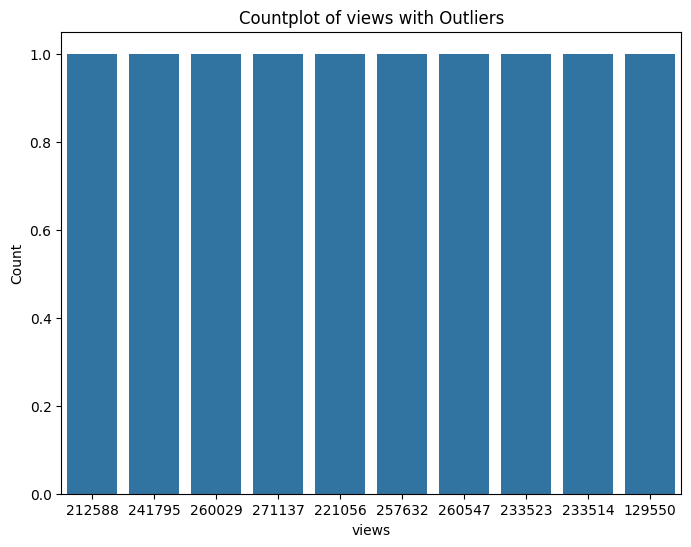

In [49]:
outlier_indices = detect_outliers(tikvahBankData, 'views')

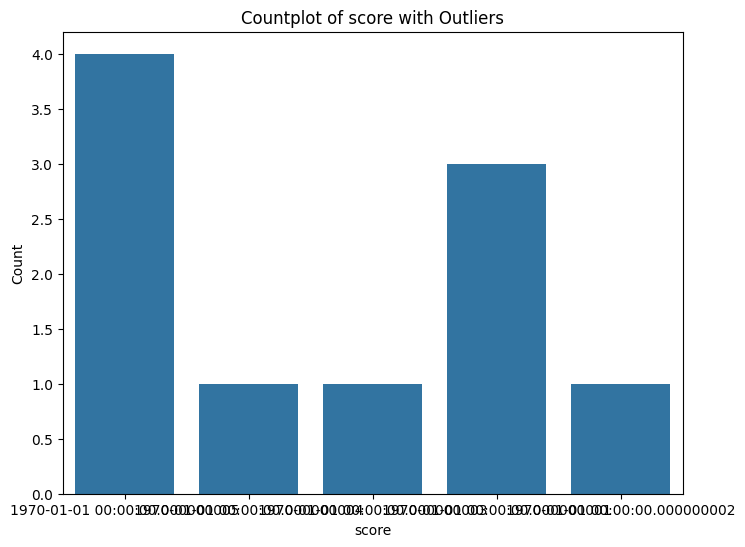

In [50]:
outlier_indices = detect_outliers(googleStoreReviewData, 'score')


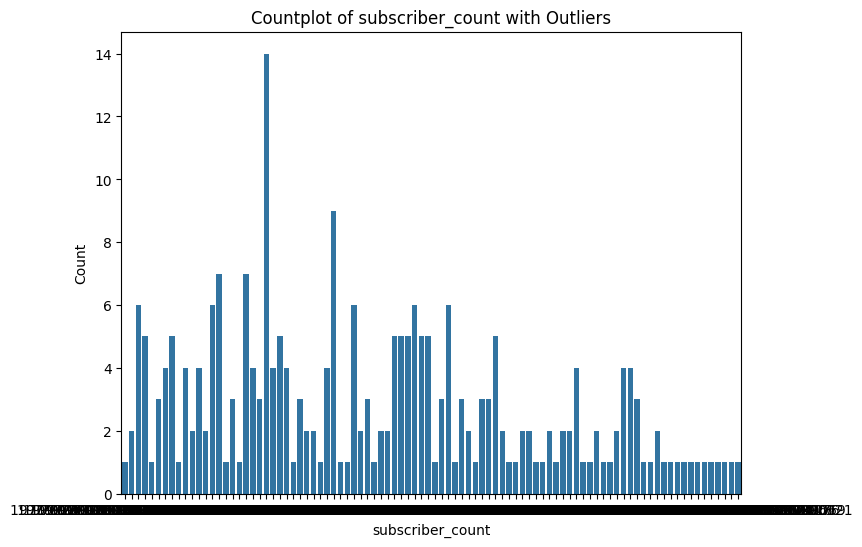

In [51]:
outlier_indices = detect_outliers(subscriberData, 'subscriber_count')

# Intermediate layer

In [52]:
tikvahBankData

,id,channel_username,message_id,message_link,views,message_content,date,image_html,banks,time
0,1970-01-01 00:00:00.000000001,tikvahethiopia,87858,https://t.me/tikvahethiopia/87858,212588,#Abyssinia_Bank<br><br>ዕሴቶቻችሁንና የሸሪዓን መርሆች በማክ...,May 24 at 11:54,"width: 800px; background-image: url(""https://c...",BOA,2024-05-24
1,1970-01-01 00:00:00.000000002,tikvahethiopia,81734,https://t.me/tikvahethiopia/81734,241795,#Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...,"Sep 26, 2023 at 10:18","width: 800px; background-image: url(""https://c...",BOA,2023-09-26
2,1970-01-01 00:00:00.000000003,tikvahethiopia,81606,https://t.me/tikvahethiopia/81606,260029,#Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...,"Sep 19, 2023 at 18:53","width: 800px; background-image: url(""https://c...",BOA,2023-09-19
3,1970-01-01 00:00:00.000000004,tikvahethiopia,81502,https://t.me/tikvahethiopia/81502,271137,#Bank_of_Abyssinia<br><br>የአቢሲንያ ባንክን የተለያዩ አገ...,"Sep 15, 2023 at 15:56","width: 800px; background-image: url(""https://c...",BOA,2023-09-15
4,1970-01-01 00:00:00.000000005,tikvahethiopia,81338,https://t.me/tikvahethiopia/81338,221056,#Bank_of_Abyssinia<br><br>ዕቁብ ልዩ የቁጠባ ሂሳብ!<br>...,"Sep 8, 2023 at 10:50","width: 800px; background-image: url(""https://c...",BOA,2023-08-09
5,1970-01-01 00:00:00.000000006,tikvahethiopia,81252,https://t.me/tikvahethiopia/81252,257632,#Bank_of_Abyssinia<br><br>ለመጪዎቹ የአዲስ አመት፣ የመስቀ...,"Sep 5, 2023 at 13:19","width: 800px; background-image: url(""https://c...",BOA,2023-05-09
6,1970-01-01 00:00:00.000000007,tikvahethiopia,81165,https://t.me/tikvahethiopia/81165,260547,#Bank_of_Abyssinia<br><br>አቢሲንያ ባንክ ለዕድሮች ባዘጋጀ...,"Sep 1, 2023 at 10:20","width: 800px; background-image: url(""https://c...",BOA,2023-01-09
7,1970-01-01 00:00:00.000000008,tikvahethiopia,81123,https://t.me/tikvahethiopia/81123,233523,#Bank_of_Abyssinia<br><br>አቢሲንያ ባንክ ለዕድሮች ባዘጋጀ...,"Aug 29, 2023 at 21:02","width: 800px; background-image: url(""https://c...",BOA,2023-08-29
8,1970-01-01 00:00:00.000000009,tikvahethiopia,81123,https://t.me/tikvahethiopia/81123,233514,#Bank_of_Abyssinia<br><br>አቢሲንያ ባንክ ለዕድሮች ባዘጋጀ...,"Aug 29, 2023 at 21:02","width: 800px; background-image: url(""https://c...",BOA,2023-08-29
9,1970-01-01 00:00:00.000000010,tikvahethiopia,76089,https://t.me/tikvahethiopia/76089,129550,አፖሎ የተሰኘው ልዩ የዲጂታል መተግበሪያ ለተጠቃሚ ዝግጁ መሆኑን ስንገልጽ...,"Jan 26, 2023 at 09:49","width: 800px; background-image: url(""https://c...",BOA,2023-01-26


In [ ]:
# tikvahBankData.to_csv(tikvahBankDataFile, i)